In [1]:
#import stumpy
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
import copy

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


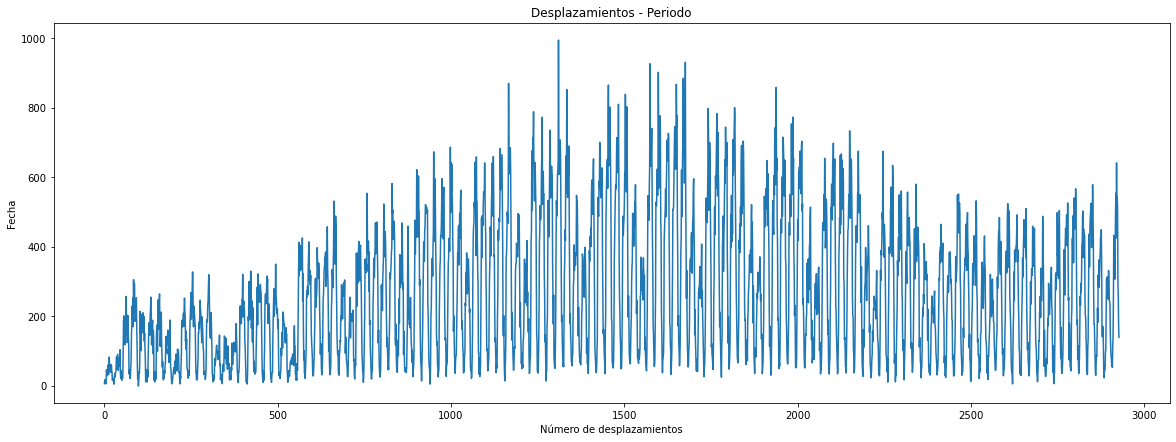

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# PROPHET
## Definimos datos de entrenamiento y datos de prueba

In [7]:
X = Periodo1.y
Y = Periodo1.ds
size = int(len(X) * 0.90)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

## Encontramos el número de Días que se van a analizar 

In [8]:
#Test.head()
start = Train.iloc[0]['ds']
end = Train.iloc[-1]['ds'] 
N_Dias = pd.date_range(start, end, freq='D')
print(len(N_Dias))

110


In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)
def est_Martes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 1)
def est_Miercoles(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 2)
def est_Jueves(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 3)
def est_Viernes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)
def est_Sabado(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5)
def est_Domingo(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 6)

# Train['Lunes'] = Train['ds'].apply(est_Lunes)
# Train['Martes'] = Train['ds'].apply(est_Martes)
# Train['Miercoles'] = Train['ds'].apply(est_Miercoles)
# Train['Jueves'] = Train['ds'].apply(est_Jueves)
# Train['Viernes'] = Train['ds'].apply(est_Viernes)
# Train['Sabado'] = Train['ds'].apply(est_Sabado)
# Train['Domingo'] = Train['ds'].apply(est_Domingo)

# Test['Lunes'] = Test['ds'].apply(est_Lunes)
# Test['Martes'] = Test['ds'].apply(est_Martes)
# Test['Miercoles'] = Test['ds'].apply(est_Miercoles)
# Test['Jueves'] = Test['ds'].apply(est_Jueves)
# Test['Viernes'] = Test['ds'].apply(est_Viernes)
# Test['Sabado'] = Test['ds'].apply(est_Sabado)
# Test['Domingo'] = Test['ds'].apply(est_Domingo)

In [10]:
# def est_Lunes8AM(ds):
#     date = pd.to_datetime(ds)
#     return (date.dayofweek == 0 and date.hour == 8)

# def est_Lunes10AM(ds):
#     date = pd.to_datetime(ds)
#     return (date.dayofweek == 0 and date.hour == 10)

# def est_Lunes2PM(ds):
#     date = pd.to_datetime(ds)
#     return (date.dayofweek == 0 and date.hour == 14)


# Train['Lunes8AM'] = Train['ds'].apply(est_Lunes8AM)
# Test['Lunes8AM'] = Test['ds'].apply(est_Lunes8AM)

# Train['Lunes10AM'] = Train['ds'].apply(est_Lunes10AM)
# Test['Lunes10AM'] = Test['ds'].apply(est_Lunes10AM)

# Train['Lunes2PM'] = Train['ds'].apply(est_Lunes2PM)
# Test['Lunes2PM'] = Test['ds'].apply(est_Lunes2PM)

def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)

Train['Lunes1AM'] = Train['ds'].apply(est_Lunes1AM)
Test['Lunes1AM'] = Test['ds'].apply(est_Lunes1AM)

Train['Lunes2AM'] = Train['ds'].apply(est_Lunes2AM)
Test['Lunes2AM'] = Test['ds'].apply(est_Lunes2AM)

Train['Lunes3AM'] = Train['ds'].apply(est_Lunes3AM)
Test['Lunes3AM'] = Test['ds'].apply(est_Lunes3AM)

Train['Lunes4AM'] = Train['ds'].apply(est_Lunes4AM)
Test['Lunes4AM'] = Test['ds'].apply(est_Lunes4AM)

Train['Lunes5AM'] = Train['ds'].apply(est_Lunes5AM)
Test['Lunes5AM'] = Test['ds'].apply(est_Lunes5AM)

Train['Lunes6AM'] = Train['ds'].apply(est_Lunes6AM)
Test['Lunes6AM'] = Test['ds'].apply(est_Lunes6AM)

Train['Lunes7AM'] = Train['ds'].apply(est_Lunes7AM)
Test['Lunes7AM'] = Test['ds'].apply(est_Lunes7AM)

Train['Lunes8AM'] = Train['ds'].apply(est_Lunes8AM)
Test['Lunes8AM'] = Test['ds'].apply(est_Lunes8AM)

Train['Lunes9AM'] = Train['ds'].apply(est_Lunes9AM)
Test['Lunes9AM'] = Test['ds'].apply(est_Lunes9AM)

Train['Lunes10AM'] = Train['ds'].apply(est_Lunes10AM)
Test['Lunes10AM'] = Test['ds'].apply(est_Lunes10AM)

Train['Lunes11AM'] = Train['ds'].apply(est_Lunes11AM)
Test['Lunes11AM'] = Test['ds'].apply(est_Lunes11AM)

# Train['Lunes12PM'] = Train['ds'].apply(est_Lunes12PM)
# Test['Lunes12PM'] = Test['ds'].apply(est_Lunes12PM)

# Train['Lunes13PM'] = Train['ds'].apply(est_Lunes13PM)
# Test['Lunes13PM'] = Test['ds'].apply(est_Lunes13PM)

# Train['Lunes14PM'] = Train['ds'].apply(est_Lunes14PM)
# Test['Lunes14PM'] = Test['ds'].apply(est_Lunes14PM)

# Train['Lunes15PM'] = Train['ds'].apply(est_Lunes15PM)
# Test['Lunes15PM'] = Test['ds'].apply(est_Lunes15PM)

# Train['Lunes16PM'] = Train['ds'].apply(est_Lunes16PM)
# Test['Lunes16PM'] = Test['ds'].apply(est_Lunes16PM)

# Train['Lunes17PM'] = Train['ds'].apply(est_Lunes17PM)
# Test['Lunes17PM'] = Test['ds'].apply(est_Lunes17PM)

# Train['Lunes18PM'] = Train['ds'].apply(est_Lunes18PM)
# Test['Lunes18PM'] = Test['ds'].apply(est_Lunes18PM)

# Train['Lunes19PM'] = Train['ds'].apply(est_Lunes19PM)
# Test['Lunes19PM'] = Test['ds'].apply(est_Lunes19PM)

# Train['Lunes20PM'] = Train['ds'].apply(est_Lunes20PM)
# Test['Lunes20PM'] = Test['ds'].apply(est_Lunes20PM)

# Train['Lunes21PM'] = Train['ds'].apply(est_Lunes21PM)
# Test['Lunes21PM'] = Test['ds'].apply(est_Lunes21PM)

# Train['Lunes22PM'] = Train['ds'].apply(est_Lunes22PM)
# Test['Lunes22PM'] = Test['ds'].apply(est_Lunes22PM)

# Train['Lunes23PM'] = Train['ds'].apply(est_Lunes23PM)
# Test['Lunes23PM'] = Test['ds'].apply(est_Lunes23PM)

# Train['Lunes24AM'] = Train['ds'].apply(est_Lunes24AM)
# Test['Lunes24AM'] = Test['ds'].apply(est_Lunes24AM)



In [11]:
#Train.iloc[210:250,:]

## Hacemos ciclo for para predecir el día siguiente uno tras otro
## La predicción se demora 50 minutos

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.6806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5515.2    0.00192902       392.074      0.3834      0.3834      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5528.67    0.00205977       119.831      0.4878      0.4878      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5531.14    0.00351372       90.5552        0.12      0.4451      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       5531.82   0.000112531       117.687   1.128e-06       0.001      491  LS failed, Hessian reset 
     399       5532.33    0.00317164       220.913           1           1      546   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5532.74   0.000786121    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.338279, expected=391.765000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.3204
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5521.56     0.0479741       382.131      0.4935           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5531.59    0.00145339       146.983           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5531.93   0.000265148       194.059   3.241e-06       0.001      304  LS failed, Hessian reset 
     299        5532.8    0.00014239       48.4346           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          5535   0.000568067       56.0225           1           1      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       5535.31   3.68997e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=368.138531, expected=303.351000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.4525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5516.57    0.00436689       399.115      0.1921      0.1921      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5531.93    0.00141274        150.53           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5535.27     0.0129749       151.865           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5537.04    0.00414399       100.434           1           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5537.75   9.92954e-05       47.0776       0.335       0.335      612   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=297.916365, expected=234.325000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.6374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5525.26     0.0191173       356.129      0.1631           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5536.24   0.000349916       110.155      0.3473           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5539.11   0.000747534        76.979       5.697      0.5697      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       5539.37   7.65088e-05       81.6026   7.022e-07       0.001      467  LS failed, Hessian reset 
     399       5539.45   1.57113e-05       59.9958           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5539.7   0.000866393    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=215.097710, expected=193.813000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.1804
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5527.26     0.0209112       320.244           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5536.04     0.0159766       131.283           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5537.11    0.00127418       259.199   1.156e-05       0.001      313  LS failed, Hessian reset 
     299       5539.28   0.000806414       117.454       0.745       0.745      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       5541.25   0.000538596       199.066   7.531e-06       0.001      546  LS failed, Hessian reset 
     399       5541.84    0.00341622       130.398      0.3257           1      589   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=152.560642, expected=106.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.417
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5531.75     0.0261742       206.762           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5541.39    0.00471089       106.274           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5543.98   0.000414474       65.6327      0.1602      0.6416      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5544.02    6.7101e-05       49.7946   8.648e-07       0.001      438  LS failed, Hessian reset 
     335       5544.03   5.14349e-05       66.3194   8.618e-07       0.001      512  LS failed, Hessian reset 
     357       5544.03   4.14946e-08       69.6889     0.01827           1      549   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=122.291687, expected=98.351000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -114.063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5533.04    0.00892538       178.925           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5542.11    0.00631812       119.305           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5545.95    0.00496514       120.244      0.8023      0.8023      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5547.22   0.000118443       65.2059      0.4019      0.4019      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5547.49   7.40088e-05       67.6942      0.3404      0.3404      642   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=109.317561, expected=35.206000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.618
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5537.01     0.0128641       102.664      0.6254      0.6254      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5545.75     0.0011253       96.6644      0.3633      0.3633      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       5547.71   0.000138075       140.532   1.931e-06       0.001      359  LS failed, Hessian reset 
     299       5548.18   1.77316e-05       64.9938       0.328           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334        5548.2   6.34008e-05       83.7011   8.045e-07       0.001      510  LS failed, Hessian reset 
     367       5548.21   9.16294e-08       53.0333      0.1622      0.4645      568   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=92.097751, expected=34.291000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.96
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5537.4     0.0029947       81.5227      0.6085      0.6085      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5546.61   0.000461013       112.493      0.6386      0.6386      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5548.66    0.00328246       124.881           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       5551.47   6.63675e-05       70.5099   6.673e-07       0.001      518  LS failed, Hessian reset 
     399       5551.55   0.000267364       74.3391           1           1      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       5551.59   6.14583e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=70.205376, expected=42.368000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5540.8     0.0280794       251.204           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5549.2     0.0108497       213.442           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       5550.64   9.81569e-05       105.175   7.383e-07       0.001      370  LS failed, Hessian reset 
     299       5551.25   0.000159683       59.3473       0.909       0.909      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5553.84     0.0141358       181.693           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     470       5554.36   0.000146298    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=62.995181, expected=30.192000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.49
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5537.37    0.00456341       215.605      0.7431      0.7431      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5551.82    0.00172094       66.6004           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5555.68   0.000235035       61.4434      0.3087      0.3087      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359        5556.4   0.000245991       78.6929   4.164e-06       0.001      485  LS failed, Hessian reset 
     399       5556.47    0.00011615       59.3117        0.64        0.64      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5556.75   4.23592e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=90.765467, expected=30.377000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.424
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5546.17    0.00611063        292.24      0.7684      0.7684      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142        5551.7   0.000145118       154.325    9.73e-07       0.001      219  LS failed, Hessian reset 
     199       5553.94    0.00659551        145.59           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278        5556.3   0.000511517       277.625   7.655e-06       0.001      425  LS failed, Hessian reset 
     299       5556.36   0.000574863       64.5703           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       5558.24   0.000151649       142.493   1.529e-06       0.001      598  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=151.748479, expected=168.007000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5550.1     0.0111587       183.563      0.7295      0.7295      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5557.74    0.00261186        342.56       0.799       0.799      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5557.83   0.000165336       154.051   1.772e-06       0.001      299  LS failed, Hessian reset 
     299       5559.82    0.00324631       143.971      0.4038           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310        5559.9    8.3428e-05       63.9799    1.54e-06       0.001      485  LS failed, Hessian reset 
     378       5560.36   8.33263e-05       89.6497   7.315e-07       0.001      608  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=220.028160, expected=219.592000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.8367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5553.43     0.0200272       188.307           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5561.82     0.0107686       151.539      0.3883           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5562.33   0.000464031       217.725   6.367e-06       0.001      301  LS failed, Hessian reset 
     245       5562.91   7.85736e-05       78.9609   7.452e-07       0.001      386  LS failed, Hessian reset 
     299       5563.18   0.000619991       195.083       0.869       0.869      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5563.7    6.8112e-06       52.8473           1           1      604   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=267.503241, expected=277.609000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.5036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5553.03     0.0171967       217.683      0.4472      0.4472      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5563.24    0.00292556        157.04           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5564.38   0.000189603       161.488   2.107e-06       0.001      353  LS failed, Hessian reset 
     299        5564.8   0.000129585       56.3718      0.9197      0.9197      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5566.37    5.1402e-05        57.967      0.2398      0.2398      560   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     426       5566.39   2.56641e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=286.121379, expected=368.209000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.3585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5552.86     0.0146605       177.232           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5562.97      0.002832       97.4221           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5566.31    0.00347337        91.564           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5567.37   0.000374837       63.7854       1.442      0.1442      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     498       5568.33   0.000144215       100.947   2.782e-06       0.001      683  LS failed, Hessian reset 
     499       5568.33   7.63422e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=296.151592, expected=313.153000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.6757
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5557.38     0.0159368        198.34           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5565.49     0.0031526       200.208           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5569.1    0.00117732           121           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5570.35   0.000143285       82.3288           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     448       5570.37   2.05163e-06       56.2526      0.2541      0.5806      560   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=317.940868, expected=390.574000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.9954
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5557.72    0.00305902       140.475           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5568.63    0.00354822       97.9218      0.8678     0.08678      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       5571.17   0.000118955       112.672   6.035e-07       0.001      357  LS failed, Hessian reset 
     299       5571.66     0.0017506       76.9569           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     393        5572.6   7.90688e-05       88.4491   1.026e-06       0.001      564  LS failed, Hessian reset 
     399        5572.6   5.00851e-05       47.5431           1           1      572   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=355.314064, expected=426.591000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.7085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5560.53     0.0079386        598.09           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5571.37    0.00411143       160.755      0.9848      0.9848      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5573.63   0.000722263       288.754   8.847e-06       0.001      395  LS failed, Hessian reset 
     299       5573.68    0.00176994       274.381           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5574.22   0.000204292       64.2575      0.2672           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     481        5574.8    0.00016668    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=390.524761, expected=478.170000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.8688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5562.67     0.0119419       156.412           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5573.21    0.00142623       170.561           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5575.81    0.00476788        266.05       0.781       0.781      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       5576.29   0.000104116       73.4217   5.063e-07       0.001      433  LS failed, Hessian reset 
     373       5576.71   2.63837e-05       49.5197    3.09e-07       0.001      551  LS failed, Hessian reset 
     396       5576.71   2.38039e-07       52.1065      0.2159     0.04482      589   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.090241, expected=398.903000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.6174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5565.6   0.000993093       88.9181           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5576.55     0.0110984       126.702           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5578.87    0.00240165       95.2514           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5579.12    0.00012586       84.3733   4.903e-07       0.001      415  LS failed, Hessian reset 
     399       5579.53   5.23207e-05       61.6564      0.4824           1      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     496       5579.58   5.92485e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=384.752929, expected=425.530000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.7418
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.43     0.0101401       115.417           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5574.56    0.00173968         113.6      0.6907      0.6907      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5578.05   0.000102254        104.06   6.744e-07       0.001      341  LS failed, Hessian reset 
     299       5579.71    0.00719136       321.213      0.4833           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5581.05    0.00404684       210.926           1           1      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5581.45   4.14355e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=367.565544, expected=401.151000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.5318
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5569.36    0.00130825        188.42      0.2102      0.2102      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5578.75     0.0184868       156.897           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5582.9   5.95179e-05        69.429      0.3805      0.3805      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5583.03   0.000304241        187.66   3.657e-06       0.001      450  LS failed, Hessian reset 
     348       5583.14   6.22786e-05       63.6465   1.028e-06       0.001      519  LS failed, Hessian reset 
     399       5583.22    0.00695423       146.156           1           1      589   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.484920, expected=422.598000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.8156
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5571.94     0.0065555       320.843      0.8738     0.08738      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5581.15    0.00466541       677.176      0.2879           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5586.16    0.00178461       108.404      0.8131      0.8131      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5586.77   7.41396e-05       93.7151   6.865e-07       0.001      496  LS failed, Hessian reset 
     399       5586.85   7.36344e-06       58.6159      0.1611           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     414       5586.85   3.67201e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=391.173561, expected=368.820000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.4165
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5571.57    0.00555822       361.956           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5583.46   0.000715857       104.424      0.9012      0.9012      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5588    0.00389757       89.6099      0.6037      0.6037      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5589.1   0.000141166         61.72           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403        5589.1   3.54995e-05       72.8996   6.641e-07       0.001      560  LS failed, Hessian reset 
     440       5589.11   6.34145e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.627295, expected=510.106000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -61.126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5576.46    0.00480976       170.094      0.9759      0.9759      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5588.29    0.00229673       115.271       1.457      0.1457      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5589.65   3.59021e-05       65.6415      0.2832      0.2832      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       5590.27   0.000146864       160.495   1.307e-06       0.001      453  LS failed, Hessian reset 
     392       5590.45   0.000104723       46.3844   1.536e-06       0.001      561  LS failed, Hessian reset 
     399       5590.45   7.76622e-06       43.4226      0.8003      0.8003      571   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=373.354562, expected=343.808000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5578.3     0.0182653       298.143           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5589.49    0.00468339         122.5           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5592.45   0.000560605       101.859           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       5593.08   7.14563e-05       80.6418   8.759e-07       0.001      468  LS failed, Hessian reset 
     399       5593.19    0.00110349       78.4848           1           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     432       5593.25   1.46945e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=303.773295, expected=209.338000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.4556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5584.18    0.00961813       132.258           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5591.6     0.0228959       170.665           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5594.19   1.66063e-05       58.7054           1           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       5594.85   8.36308e-05       80.2201   1.543e-06       0.001      532  LS failed, Hessian reset 
     399       5594.86   2.46857e-05       77.4603           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          5595   0.000786414    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=220.597826, expected=148.256000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.316
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5584.06    0.00176849       380.284      0.3064      0.3064      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5591.82    0.00162714       204.335      0.4604      0.4604      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5596.22    0.00330494       72.3778      0.4423           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5596.98   0.000199249       68.5028           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     430       5597.16   0.000314873       187.224   4.013e-06       0.001      598  LS failed, Hessian reset 
     474       5597.23   2.42976e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=157.695960, expected=104.077000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -113.149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5586.22    0.00680843       148.877           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       5592.38   8.82667e-05       98.1363   1.015e-06       0.001      265  LS failed, Hessian reset 
     199       5593.32   0.000889396       238.036           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5597.09   6.42448e-05       71.0582   7.654e-07       0.001      403  LS failed, Hessian reset 
     274       5598.05   8.57394e-05       70.0343   5.147e-07       0.001      470  LS failed, Hessian reset 
     299        5598.4   0.000508834       81.9186      0.4006           1      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=127.011594, expected=125.294000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5589.01    0.00637167       516.253           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5600.03    0.00645262       191.975           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233        5601.1   0.000123132       132.493   9.946e-07       0.001      362  LS failed, Hessian reset 
     270       5601.61   0.000188401       190.561   1.406e-06       0.001      464  LS failed, Hessian reset 
     299       5601.89   0.000370747       71.6257       4.801      0.8068      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5602.34   6.80417e-05       48.7813      0.0837      0.9701      628   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=113.662728, expected=77.032000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -121.879
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5589.11      0.021629       536.993           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5601.8    0.00178929       105.821      0.8083      0.8083      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5604.25     0.0010181       115.135      0.4743      0.4743      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5605.01   0.000124099       75.2892           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5605.32    0.00128635       92.0314           1           1      614   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=96.756971, expected=60.237000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.624
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5594.02     0.0364087       401.611           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5603.07     0.0102041       59.4498      0.9399      0.9399      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5606.89    0.00120924        163.37      0.4623           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5607.4   6.53894e-05       44.4518      0.3314           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5607.59   0.000926485       48.2545           1           1      607   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=74.174502, expected=29.376000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.827
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5596.38    0.00833912       253.386           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5606.39    0.00506322        84.111      0.9074      0.9074      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5608.57   0.000138934       149.353   1.056e-06       0.001      376  LS failed, Hessian reset 
     299       5609.14   0.000629753        120.72     0.03925           1      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5609.9   0.000109535       54.1679      0.3688           1      549   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5610.06   5.01354e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=66.368974, expected=30.193000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5599.49     0.0161519       625.664           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5607.83    0.00204393       104.913      0.2113           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5611.21    0.00178603       103.518           1           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5612.16   7.56631e-05        97.548    8.04e-07       0.001      505  LS failed, Hessian reset 
     399       5612.19   9.84445e-07       46.3069           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       5612.19   1.40273e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=93.511333, expected=59.937000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.75
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5599.32    0.00557203       264.674      0.3421      0.3421      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5611.25   0.000537361       164.336      0.4992      0.4992      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       5614.13   0.000118156       144.392   1.492e-06       0.001      409  LS failed, Hessian reset 
     299       5614.15   2.38055e-06       71.6074      0.2089           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5614.87     0.0001055       56.9544      0.4575      0.4575      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       5614.87   3.49209e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=154.120651, expected=145.410000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5603.57     0.0103763       252.996           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5614.08    0.00478016       178.624      0.7067      0.7067      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5615.83   0.000232622       195.934   2.376e-06       0.001      360  LS failed, Hessian reset 
     299       5616.38    0.00355286       81.7313           1           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5617.13    0.00221953       86.6326           1           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5617.39   8.88695e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=221.501881, expected=201.195000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.4718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5607.03    0.00498228       317.524       2.191      0.2191      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5615.41     0.0157302       213.887           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5618.64   0.000444994       80.1057       3.406           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5619.68   0.000233762       81.8632      0.5209           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       5619.72   4.16595e-05       70.8954   6.411e-07       0.001      580  LS failed, Hessian reset 
     499        5619.8   0.000254397    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=267.588109, expected=299.545000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.0326
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5609.58    0.00335616       659.484      0.3778      0.3778      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5618.61     0.0263339       129.027           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243        5620.7   0.000205942       205.854   1.218e-06       0.001      358  LS failed, Hessian reset 
     299        5621.4   9.10414e-05       60.1165           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5622.31    0.00288204       117.568      0.2938      0.9057      553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       5622.55   7.22408e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=286.221324, expected=235.375000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.4533
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5612.84      0.026419       177.492           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5621.24     0.0115027       470.012      0.6833      0.6833      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5624.41   0.000230525       89.9869      0.3977      0.3977      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5625.17   2.53348e-05       49.6717           1           1      520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5625.32    0.00144785       93.6455           1           1      643   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=293.684117, expected=283.292000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.3488
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5612.19     0.0204053       263.927           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5622.63   0.000962202       100.698      0.3026           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5627.03    0.00124606        74.351      0.4866      0.4866      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       5627.37   9.11316e-05       53.2788   4.679e-07       0.001      448  LS failed, Hessian reset 
     392       5627.57   6.77925e-07       72.0316      0.3435           1      542   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=313.983560, expected=337.505000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5614.16     0.0304474       354.738           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5625.96    0.00335272       148.466      0.9872      0.9872      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       5627.86   0.000497079       111.036    8.34e-06       0.001      389  LS failed, Hessian reset 
     299       5627.87    1.3112e-05       65.5065      0.8741      0.8741      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5629.67    0.00103252       104.672           1           1      539   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       5629.78   6.74805e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=350.954076, expected=332.286000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.2095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5619.1    0.00143736       321.738      0.3564      0.7927      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       5622.89   0.000611095       295.232   4.488e-06       0.001      215  LS failed, Hessian reset 
     199       5626.25      0.010004       126.715           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5629.97    0.00178389       136.343     0.06815           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5632.18     0.0084286       75.6139      0.5353      0.5353      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5632.63   7.58294e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=382.592757, expected=318.002000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.7991
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5623.59     0.0125527       331.728           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5632.43     0.0191933       191.318           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5634.35   7.98137e-05       59.7749      0.5099      0.5099      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327       5634.39   3.14991e-08       52.3113     0.05533     0.05533      422   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=389.179161, expected=459.266000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.297
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5623.88    0.00153963       170.796     0.04761      0.9124      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5633.14   0.000428586       61.2739      0.4028      0.4028      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5635.51   0.000472147       105.135           1           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321        5636.1   0.000134376       142.938   1.432e-06       0.001      455  LS failed, Hessian reset 
     399       5636.61   0.000168082        70.207       1.497      0.1497      560   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     468       5636.96   6.96737e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=373.191691, expected=365.085000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.3229
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5625.9     0.0115554       449.313           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5636.43    0.00431972       113.608      0.2659           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5638.36    0.00431499       80.4072      0.3997           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5638.87   0.000366143       78.3811           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     479       5638.99    0.00011975       87.2572   2.375e-06       0.001      620  LS failed, Hessian reset 
     499          5639   5.35157e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=356.114594, expected=421.433000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.5552
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5626.24    0.00780331       109.011      0.5747      0.5747      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5636.72     0.0109765       114.307           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5637.94   8.01696e-05       61.1227   5.032e-07       0.001      338  LS failed, Hessian reset 
     266       5638.19   8.44922e-05       71.1098   1.544e-06       0.001      402  LS failed, Hessian reset 
     299       5638.32   0.000680073       84.8848           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5641.01   0.000106625       106.992   1.389e-06       0.001      599  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=357.879504, expected=344.749000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.0536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5626.8     0.0195178       943.217           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5639.29   0.000818742       76.0017      0.4654      0.4654      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5643.53    0.00170198       133.836      0.5313           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       5643.91   0.000537706         245.8   5.894e-06       0.001      461  LS failed, Hessian reset 
     399       5644.47    0.00632195        149.19       1.842      0.1842      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485       5644.66   5.87029e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=375.989241, expected=383.991000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.0992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5632.24    0.00358427       247.203      0.1221      0.9235      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5643.72    0.00046135       59.2236       0.219       0.219      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215        5644.2   0.000179399       174.045   1.724e-06       0.001      306  LS failed, Hessian reset 
     299       5645.74     0.0120055        245.29       0.638       0.638      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5645.84   9.69263e-05       79.3805   1.475e-06       0.001      511  LS failed, Hessian reset 
     352        5646.1    9.8803e-05       72.8341   1.336e-06       0.001      599  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=383.595218, expected=453.450000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5634.49    0.00402295       160.844      0.8212      0.8212      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5645.3   0.000473594       116.671      0.5134      0.5134      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5648.05   0.000309432       92.3388           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330        5648.1   0.000192096       92.3133   2.594e-06       0.001      457  LS failed, Hessian reset 
     399       5648.14   0.000189064        69.036      0.4675      0.4675      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     469       5648.73   2.12953e-05      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=354.556974, expected=338.864000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6622
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5638.38     0.0210243       94.2357           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5648.79      0.012138       82.4292           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       5649.56   0.000159459       159.952   1.556e-06       0.001      316  LS failed, Hessian reset 
     285       5650.27    0.00037433       198.174   4.555e-06       0.001      438  LS failed, Hessian reset 
     299       5650.35   0.000398508       68.9659           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5651.33   0.000255959       78.3669      0.6777      0.6777      583   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=283.984129, expected=309.323000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.9937
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5637.71     0.0101705       559.875           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5651.1     0.0273635       139.928           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5653.59    0.00278958       123.222      0.2134           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5654.5   0.000361978       103.387      0.4694     0.04694      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5654.72   7.44915e-05       56.4312           1           1      657   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=202.173017, expected=182.878000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.1412
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5645.45     0.0299201       682.862           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5654.01    0.00278257       155.428           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5655.86   0.000166263       77.0768     0.02967           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5657.09   0.000327507       102.733      0.7332      0.7332      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5657.2   1.01354e-05       52.3319      0.9498      0.9498      649   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=138.715432, expected=121.623000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5645.56    0.00437213       421.292           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5655.01     0.0020099        131.99     0.08889      0.5485      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5656.25   0.000102685       66.7175   4.788e-07       0.001      366  LS failed, Hessian reset 
     299       5656.67   0.000325887       87.5746           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       5656.74   7.94525e-05       80.4866   1.031e-06       0.001      474  LS failed, Hessian reset 
     399       5658.72    0.00382635       89.6781      0.3431      0.3431      586   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=106.178629, expected=114.174000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5648.93     0.0295358       590.251           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5658.73      0.021744       303.689           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5660.89   0.000475364       161.311      0.4961      0.4961      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5660.91   0.000242531       88.6578   3.642e-06       0.001      419  LS failed, Hessian reset 
     399       5661.77    0.00685348        135.99           1           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     460       5662.01   2.54027e-05      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=90.394205, expected=84.302000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -120.241
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5646.38    0.00295646       199.124      0.4019     0.04019      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5659.59     0.0155348       263.568           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5662.89    0.00175591       109.314      0.7893      0.7893      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5664.01   0.000309852       73.7235      0.6387      0.6387      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     415       5664.03   1.71606e-05        62.872   2.575e-07       0.001      557  LS failed, Hessian reset 
     469       5664.07   5.92337e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=71.070773, expected=37.772000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5651.19    0.00416558       279.112           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5661.56    0.00173599       373.653           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5666.16    0.00316482       130.388           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5667.36   0.000241767       59.2165      0.1567           1      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5667.49   1.43126e-06       59.1574      0.6679      0.6679      647   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=46.156772, expected=28.528000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.016
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5657.51     0.0144556       477.512       3.561      0.3561      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5666.6    0.00794385       164.404      0.9667      0.9667      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       5667.87   9.56454e-05       95.7844    8.12e-07       0.001      368  LS failed, Hessian reset 
     299       5668.68   0.000903533       125.868           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       5669.16   4.94232e-05       95.8461   1.004e-06       0.001      588  LS failed, Hessian reset 
     399       5669.16   1.93022e-06       57.7942      0.2334      0.7525      606   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=35.321891, expected=12.454000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.234
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5656.48   0.000856838       380.351      0.2912      0.2912      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5666.4   0.000645835       143.822      0.2849      0.2849      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5670.23   7.82836e-05       88.4778   7.258e-07       0.001      397  LS failed, Hessian reset 
     299       5670.26   0.000559743       77.6315           1           1      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5671.23   1.91897e-05       48.1378      0.2866           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     410       5671.24   5.99199e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=58.921584, expected=29.899000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.504
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5656.9     0.0101322       159.102      0.9724      0.9724      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5667.45   0.000981913       399.315   8.879e-06       0.001      270  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5672.66    0.00667069        186.65        0.49       0.049      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5674.57    0.00101299       63.2168           1           1      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     486       5674.71   7.84179e-06       55.3039   1.438e-07       0.001      680  LS failed, Hessian reset 
     499       5

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=114.824439, expected=72.975000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -124.074
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5661.84     0.0123209       756.203           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5673.29     0.0152978       194.104           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5676.55   0.000106637       57.9492           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     371       5677.16   0.000176326       83.8085   3.247e-06       0.001      499  LS failed, Hessian reset 
     399       5677.19   1.96939e-06       62.8465      0.3507      0.3507      538   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     408       5677.19   8.01852e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=177.668690, expected=75.207000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5664.38    0.00485387       276.311      0.1011      0.4549      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5675.24    0.00179058       117.836      0.4024      0.4024      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5677.87   0.000718575       136.102      0.7883      0.7883      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5678.88    0.00038065       97.2877      0.8491      0.8491      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5679.2   5.50734e-05       71.0144           1           1      660   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=218.628682, expected=130.411000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.144
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5666.42     0.0136724       158.058           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5674.51    0.00719244       95.2632           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5679.77     0.0008856       212.257      0.1975           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5680.25   0.000297076       58.0472      0.4741      0.4741      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5680.89     0.0120854       148.335      0.3686           1      641   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=231.921066, expected=129.469000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.428
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5667.26    0.00625502       311.598           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5678.79     0.0109161       128.076           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5681.92    0.00574724        115.76           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     364       5682.17   9.06788e-05       71.1704   1.639e-06       0.001      505  LS failed, Hessian reset 
     399       5682.22   0.000161788       47.9039           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     446       5682.29   5.89667e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=235.490627, expected=212.467000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.7401
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5671.36     0.0135077       288.892           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5680.09    0.00159781       178.022      0.4599      0.4599      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5683.86    0.00195813        188.85      0.9743     0.09743      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5684.48   6.74213e-05       81.9998   9.275e-07       0.001      461  LS failed, Hessian reset 
     399       5684.64     0.0028714       66.2391           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5684.92   0.000698601    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=251.737487, expected=202.693000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.8688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5668.78     0.0180056       730.188           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       5678.09   0.000167072       171.261    1.28e-06       0.001      265  LS failed, Hessian reset 
     199       5678.68    0.00104928       242.092      0.6654      0.6654      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5685.31     0.0044393       68.5482       0.346           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5686.81   0.000331791       116.912           1           1      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5687.11    2.1656e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=283.329186, expected=258.271000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.0303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5676.84     0.0027953       110.875           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5685.12     0.0094255       199.143      0.6849      0.6849      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5688.5   0.000419642       100.797      0.2494           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5689.37   0.000189481       63.3692           1           1      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5689.95    0.00819799       248.695       4.599      0.4599      616   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=311.311445, expected=196.836000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.2101
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5677    0.00977406         430.3       0.266       0.266      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5687.16   0.000883753       65.1697           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5690.27     0.0158298       103.335       2.952      0.2952      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5691.04    0.00032108       187.431   3.926e-06       0.001      431  LS failed, Hessian reset 
     349       5691.16   7.12961e-05       66.1236   5.004e-07       0.001      509  LS failed, Hessian reset 
     399       5691.18   0.000298874       59.1454      0.7985           1      577   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=311.832420, expected=338.762000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.3263
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5680.91    0.00277796       134.278      0.9692      0.9692      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5690.08     0.0142082       236.855      0.2747           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       5692.22   7.77183e-05       82.6081    9.78e-07       0.001      359  LS failed, Hessian reset 
     299       5692.49   0.000619127       56.4068      0.6724           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5693.51    0.00664809       78.8613           1           1      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     401       5693.51   0.000446401    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=294.546630, expected=246.286000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.1873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5679.95     0.0110791       138.449           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5690.85    0.00286018       182.987      0.3199      0.8364      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5694.46    0.00251123       115.961       3.296      0.3296      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     390       5696.05   0.000150496       135.397   2.111e-06       0.001      533  LS failed, Hessian reset 
     399       5696.09   0.000595097       120.912           1           1      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       5696.16   6.60029e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=273.349304, expected=245.640000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.3204
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5683.32    0.00379965       811.673      0.3871           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5694.44     0.0130745        108.01      0.6009      0.6009      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5698.22    0.00087094       339.911      0.2509      0.2509      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     395       5698.85   0.000206604       56.1315   3.709e-06       0.001      566  LS failed, Hessian reset 
     399       5698.85   7.80932e-05       49.8545       0.843       0.843      570   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     460       5699.03    0.00024581    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=271.809593, expected=317.502000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5685.35      0.002463       564.812      0.1366      0.7077      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5693.76     0.0192744       448.028      0.3492      0.9157      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5699.78   0.000201751       59.7483      0.6211      0.6211      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5700.93   0.000392907       98.9491      0.8689     0.08689      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5701.5   0.000686795       75.6903      0.8987      0.8987      618   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=286.996731, expected=312.174000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.2806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5690.7    0.00804024       167.165           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5700.63    0.00100401       53.2554       1.553      0.4801      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5703.36    0.00888685       97.1471           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5703.62   7.72159e-05       84.8768   7.835e-07       0.001      433  LS failed, Hessian reset 
     399        5703.8   6.95768e-05       60.8046      0.3257      0.3257      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5703.82   6.48433e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=292.590489, expected=487.916000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.0769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5685.99    0.00482564       105.301           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5696.97    0.00258752       87.2341      0.7052     0.07052      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5697.53   0.000150157       154.682   1.139e-06       0.001      319  LS failed, Hessian reset 
     299       5700.54     0.0127159       172.172           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5700.62   0.000118421       94.8173   5.044e-07       0.001      458  LS failed, Hessian reset 
     359       5701.26    8.7573e-05       75.5452   5.115e-07       0.001      587  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=263.064790, expected=341.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.121
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5690.47    0.00712959       431.258      0.8258     0.08258      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5701.29    0.00175564       230.785           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5701.93    0.00150754       313.155   1.482e-05       0.001      292  LS failed, Hessian reset 
     265       5703.13   0.000890237       110.721   5.291e-06       0.001      398  LS failed, Hessian reset 
     299       5703.36    5.3285e-06        50.653      0.2664           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5703.42   0.000124494       140.507   1.107e-06       0.001      502  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=193.743801, expected=345.923000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.7571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5688.18    0.00285685       230.728      0.2398           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5698.34     0.0164084       695.362           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5704.11     0.0018186       99.2274      0.8923      0.8923      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5704.15   0.000650629       307.747   8.525e-06       0.001      394  LS failed, Hessian reset 
     399       5704.71   0.000477514       87.1492      0.5682      0.5682      520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5705.33   0.000115975    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=112.558429, expected=203.079000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.0461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5694.08    0.00978785        193.06           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5703.25      0.029989       101.005       1.703      0.1703      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5706.2    0.00316319       81.7873           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5707.16    0.00437485        198.48           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405       5707.29   0.000102628       109.542   5.997e-07       0.001      532  LS failed, Hessian reset 
     499       5707.61    0.00290517    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=50.169470, expected=56.614000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5694.94     0.0133634        393.16       1.404      0.1404      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5705.39    0.00374262       140.119      0.2234      0.6938      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5708.4   0.000248802       70.2476           1           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5709.5    0.00024448       86.7112           1           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     430        5709.6     8.694e-05       98.9597    7.38e-07       0.001      619  LS failed, Hessian reset 
     499       5709.68   1.41172e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=17.662664, expected=160.018000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.45
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5695.04     0.0268212       211.472           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5706.48    0.00320628         100.4           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5707.46   0.000118258        137.82   8.559e-07       0.001      322  LS failed, Hessian reset 
     299       5708.26   0.000353598       92.2844      0.8506      0.8506      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       5709.92   4.28815e-05       63.8979   7.212e-07       0.001      575  LS failed, Hessian reset 
     399       5709.93   1.42757e-05       47.7328           1           1      576   
    Iter      log prob 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=2.587961, expected=90.838000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -118.654
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5697.07    0.00520504       323.452           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5708.02    0.00553019       185.415           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5711.45     0.0071072       154.422      0.5011      0.5011      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       5711.88   8.03325e-05       91.6953   5.561e-07       0.001      447  LS failed, Hessian reset 
     383       5712.15   6.62715e-05       74.8654   1.032e-06       0.001      561  LS failed, Hessian reset 
     399       5712.23   9.58064e-05       47.4392           1           1      583   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-15.217003, expected=43.602000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.956
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5698.36     0.0199004       158.227           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5709.06    0.00183352       187.656      0.5744      0.5744      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5713.02   0.000653714       111.759           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5714.4   7.57397e-05       66.6308           1           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     441       5714.85   0.000562895       184.449   8.084e-06       0.001      615  LS failed, Hessian reset 
     499       5715.09    0.00114158    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-38.685458, expected=27.312000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.051
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5702.91    0.00191715       199.181      0.2154      0.5972      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5711.87    0.00792005       264.566           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       5711.93   0.000518085       154.787   7.752e-06       0.001      294  LS failed, Hessian reset 
     299       5714.34   0.000162937       80.0238      0.3854      0.3854      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       5716.18   0.000134177       148.867   7.804e-07       0.001      531  LS failed, Hessian reset 
     399       5716.46   0.000292802       78.1592           1           1      577   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-47.463368, expected=29.983000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.039
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5703.66    0.00120699       161.955           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5714.4     0.0101028       136.045           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5718.42   0.000412556        120.14      0.4036      0.4036      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     392       5718.93   9.85694e-05       111.641   9.795e-07       0.001      548  LS failed, Hessian reset 
     399       5718.98   0.000283562       77.4817           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5719.19   6.10975e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-22.623696, expected=42.114000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.517
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5705.7    0.00605476       590.986           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5717.04   0.000513511       93.2509           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5720.31    0.00127626        107.17           1           1      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       5721.12   7.96032e-05       87.7682   1.202e-06       0.001      555  LS failed, Hessian reset 
     399       5721.12   5.35831e-05       74.4058           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       5721.13   7.26333e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=34.908438, expected=77.575000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.071
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5706.66    0.00584498       248.096           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          5717    0.00266601       152.058      0.4034           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5721.8    0.00217936       110.289           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5722.7   0.000157485       57.2352           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5724.03    0.00123989       88.7747      0.4536           1      631   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=99.373626, expected=64.304000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.603
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5705.16    0.00683079       248.532      0.8877      0.8877      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5720.46    0.00593591        123.59           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       5724.89   9.43854e-05       103.889   8.831e-07       0.001      401  LS failed, Hessian reset 
     299       5724.96   6.95218e-05       48.6617           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5725.02   7.50242e-05       79.1662   6.642e-07       0.001      483  LS failed, Hessian reset 
     399       5725.33    0.00342919       118.563      0.5163      0.5163      586   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=143.393464, expected=81.353000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -121.831
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5711.68     0.0274836       348.079           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5723.39   9.26322e-05       107.219      0.2559      0.2559      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5727.31    0.00552242       277.832           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       5727.95   8.58475e-05       104.307   1.064e-06       0.001      534  LS failed, Hessian reset 
     399       5727.97   5.34957e-05       75.4628           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5728.35   8.91344e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=160.319743, expected=160.370000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.5355
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5715.45    0.00863362       476.076      0.2857           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5727.47    0.00820284       60.7128           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5730.32    0.00477969       107.123           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360        5730.8   0.000297992       105.243    4.99e-06       0.001      489  LS failed, Hessian reset 
     399       5730.84   4.81397e-05       56.3672      0.4402      0.4402      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5731.37   9.44429e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=168.973930, expected=194.395000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -90.279
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5718.6    0.00539615        520.36      0.3943      0.3943      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5728.38     0.0152372       174.931      0.4855      0.4855      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5732.77    0.00979145       280.751           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       5733.11   7.23392e-05       85.7055   9.199e-07       0.001      542  LS failed, Hessian reset 
     399       5733.14   1.12236e-05       68.7834      0.9388      0.9388      580   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       5733.15   3.67529e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=190.210361, expected=173.839000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.1644
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5720.57     0.0268131       134.806           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5730.71      0.003939        249.72       0.378           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5734.37    0.00703676       269.169      0.2342           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       5735.13   8.59622e-05       96.8772   6.974e-07       0.001      460  LS failed, Hessian reset 
     399       5735.45    0.00109124       107.364      0.9646      0.9646      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     489       5735.75   3.16314e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=226.042901, expected=295.288000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.0324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5723.13     0.0534499       272.687           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5733.8     0.0022901        355.75      0.3775      0.3775      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       5736.91   8.45945e-05       95.0754   7.095e-07       0.001      353  LS failed, Hessian reset 
     299       5737.14    0.00060707       90.0077     0.09702           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5737.15   0.000321033       54.1497   3.567e-06       0.001      453  LS failed, Hessian reset 
     399       5737.81   0.000416312       85.0674           1           1      591   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=259.392810, expected=270.772000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.6306
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5723.26    0.00313094       240.503      0.6561      0.6561      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5735.56    0.00821751       142.998       3.113     0.09779      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279        5738.5   0.000102231       106.056   6.135e-07       0.001      386  LS failed, Hessian reset 
     299       5739.43    0.00017764       111.254      0.6685      0.6685      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5739.79    0.00735902       67.3183           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     478        5740.8   0.000187592    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=269.571546, expected=205.124000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.9611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5730.14    0.00797589       215.097      0.5085      0.5085      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5740.57    0.00302464       106.802           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5742.75   0.000359615       127.329      0.4529      0.4529      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5742.88   6.24266e-05       73.0524   8.306e-07       0.001      446  LS failed, Hessian reset 
     399          5743   1.15641e-05       60.4511           1           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5743.4   0.000261457    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=255.773484, expected=207.082000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.5524
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5728.76    0.00628984       253.533           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5739.2     0.0283719        260.39           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5744.46    0.00208746       91.8785      0.5362      0.5362      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5744.93   9.53196e-05       119.412    1.45e-06       0.001      464  LS failed, Hessian reset 
     399       5745.19   0.000570982        117.06      0.4563           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     475       5745.81   8.85401e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=241.307360, expected=248.016000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.5001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5730.78    0.00509601       138.929           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5742.66    0.00266578        111.34      0.6972      0.6972      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5746.26    0.00292105       97.4702           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       5747.08   7.02344e-05       75.2283   6.258e-07       0.001      485  LS failed, Hessian reset 
     399       5747.13   5.10059e-06       65.6243      0.1396      0.5683      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     412       5747.14   7.03051e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=246.844216, expected=260.069000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.4334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5733.65    0.00140176       303.382      0.4042      0.4042      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5746.86    0.00894779       119.787           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5749.88   0.000305882       121.237      0.2744      0.2744      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       5750.63   3.16034e-05       68.4219   5.544e-07       0.001      549  LS failed, Hessian reset 
     399       5750.63   2.83893e-06        54.597       0.357           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       5750.64   1.10393e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=268.532874, expected=265.417000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.5675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5736.74    0.00520766       183.936      0.1504      0.8509      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5748.47   0.000819232        180.33      0.5233      0.5233      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5752.4    0.00182321       165.169      0.4442           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5753.33   4.48639e-05       72.6771      0.2978      0.2978      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     430       5753.38   0.000108983       81.6975   1.369e-06       0.001      596  LS failed, Hessian reset 
     480       5753.44    0.00021102    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=280.742490, expected=313.587000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.8281
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5741.26    0.00734936       295.264       0.963       0.963      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5752.35    0.00594124       233.525      0.1606           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5754.03   2.21243e-06       68.2317      0.3024      0.3024      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     395        5755.1   0.000283211       147.894   4.597e-06       0.001      570  LS failed, Hessian reset 
     399       5755.11   0.000108896       68.0225           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5755.32   0.000624945    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=256.607274, expected=341.557000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.8969
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5744.68     0.0149548       253.569      0.9968      0.9968      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5752.46    0.00181893       102.734     0.07733      0.4178      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5756.3    0.00170324       266.669      0.3478      0.3478      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5757.34   0.000282679       79.9371      0.7722      0.7722      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     421       5757.45   6.50139e-05       111.111   1.005e-06       0.001      560  LS failed, Hessian reset 
     499       5757.51   0.000801882    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=195.485161, expected=233.777000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.2217
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5743.41    0.00106965       374.633      0.5367      0.5367      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5755.68    0.00094112       157.087      0.3224      0.3224      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5759.22    0.00157565       292.749      0.3196      0.3196      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5759.41   0.000105156       116.445   9.722e-07       0.001      434  LS failed, Hessian reset 
     399       5759.94    0.00555937       62.1339           1           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5760.29    0.00019775    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=122.045119, expected=215.325000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.9312
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5747.32     0.0105182       214.225       2.876      0.2876      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5756.81    0.00436137       102.762           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5760.97   7.11418e-05        61.018      0.3698      0.3698      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5761.06   8.76883e-05       85.2577   1.136e-06       0.001      473  LS failed, Hessian reset 
     399       5761.11   1.34585e-06       54.1916      0.4074      0.4074      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     496       5761.88   0.000589657    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=67.703779, expected=122.504000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.283
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5746.95    0.00315594       249.196      0.3947      0.3947      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5749.14   0.000342585       232.034   3.267e-06       0.001      190  LS failed, Hessian reset 
     199       5758.42    0.00233366       175.252      0.5582      0.5582      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5762.59    0.00033211       75.8584           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5763.54   0.000462433       47.5801      0.9877      0.9877      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       5764.23   0.000786889    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=42.907133, expected=40.139000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5753     0.0104612       144.653           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5761.75    0.00111157       117.981           1           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5765.41     0.0016674       183.568      0.5997      0.5997      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       5766.86   0.000104631       98.7827   1.149e-06       0.001      561  LS failed, Hessian reset 
     399       5766.86   2.11443e-06       55.5025      0.6928     0.06928      576   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     447       5766.92   8.92992e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-8.144206, expected=116.619000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.057
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5750.22     0.0058023       229.643           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5761.89    0.00665163       92.2149           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5767.39   0.000408503       96.1408      0.3963      0.3963      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       5767.59    0.00028512       73.3689   3.737e-06       0.001      475  LS failed, Hessian reset 
     381       5767.62   1.97359e-05       62.3597   2.539e-07       0.001      581  LS failed, Hessian reset 
     399       5767.62   4.85816e-07        66.781           1           1      605   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=21.602829, expected=46.237000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.416
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5757.43     0.0146843       916.054           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5767.74     0.0137394       358.024           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       5769.88   0.000393134       229.308    4.47e-06       0.001      370  LS failed, Hessian reset 
     299       5770.09   6.65615e-05       48.9033      0.8282      0.8282      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5770.12   9.40008e-05       100.223   1.158e-06       0.001      475  LS failed, Hessian reset 
     355       5770.17   5.63527e-05       79.5082   6.707e-07       0.001      558  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-53.741170, expected=6.741000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -149.519
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5760.29     0.0114278        284.51      0.9937      0.9937      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5769.92    0.00010652          85.1      0.3866      0.3866      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5772.1    0.00518216       87.0525           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5773.52   0.000850476       104.528           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5773.67   0.000285657       88.5275      0.2524           1      624   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-88.054141, expected=32.455000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5762.82    0.00443933       179.362           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5770.87    0.00193877       100.425      0.9773      0.9773      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5771.53   0.000114061       81.5443   4.912e-07       0.001      301  LS failed, Hessian reset 
     299       5773.77   0.000936215       137.489      0.2754           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5774.77     0.0125036       111.743       0.534       0.534      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5776.01   0.000100532     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-28.763188, expected=35.540000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5762.54    0.00385518       293.983           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5773.61    0.00145438       66.7042           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5776.59    0.00725927       79.1515           1           1      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5778.28   5.82047e-05       52.8612           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5778.67    0.00118039       68.7932           1           1      633   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=26.864171, expected=132.610000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.474
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5765.76     0.0135244       140.685           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5775.5    0.00167045       158.295      0.8265      0.8265      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5778.47   0.000334478       72.9531      0.9039      0.9039      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     372        5780.2   0.000106471       78.9715   1.471e-06       0.001      539  LS failed, Hessian reset 
     399       5780.35    0.00072765       77.8235           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5780.73   0.000475965    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=61.162731, expected=246.431000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1666
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5767.98     0.0253451       593.606           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5776.46    0.00277786       279.439           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5780.36    0.00351476       92.8766           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     367       5781.47   3.20289e-05       68.7912   3.124e-07       0.001      524  LS failed, Hessian reset 
     390       5781.48   1.19943e-07       68.7581     0.07732           1      556   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=64.742404, expected=319.591000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.5814
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5767.8     0.0426219       516.053           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5778.36    0.00251011       165.684           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5779.97     0.0194185        262.57           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       5781.02   0.000108938       108.343   1.613e-06       0.001      509  LS failed, Hessian reset 
     399       5781.55   0.000155318       80.7226      0.4495      0.4495      565   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5781.82    0.00650061    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=65.943657, expected=325.333000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5769.98    0.00292423       151.449      0.9115      0.9115      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5777.59    0.00229946       113.477           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       5778.88   7.92907e-05       82.4686   6.229e-07       0.001      324  LS failed, Hessian reset 
     299       5779.75   0.000704095        75.606           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5780.92    0.00899193       117.051           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     462       5781.41   8.68539e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=121.657337, expected=276.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.1861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5769.31     0.0042169       94.5862           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5778.54     0.0029766       106.098      0.3446           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248        5779.9   0.000133386       148.938   9.537e-07       0.001      350  LS failed, Hessian reset 
     299       5780.92   1.50441e-05       75.8626      0.2844      0.2844      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375        5782.5   0.000814848       298.766   1.105e-05       0.001      554  LS failed, Hessian reset 
     399       5782.69    0.00117846       115.916           1           1      584   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=215.466742, expected=321.278000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5774.85    0.00106297       274.175      0.7364      0.7364      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5781.81    0.00222345       223.767           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5782.9    0.00234718       235.132      0.5788      0.5788      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5785.01   0.000151079       77.4352      0.7204      0.7204      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5785.4     0.0156262       114.966           1           1      631   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=310.832666, expected=318.630000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.7404
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5777   0.000747832       668.493      0.5247      0.5247      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5785.66    0.00435046       199.787           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5787.51   0.000415931       60.5056      0.8509      0.8509      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326        5787.6   0.000108785       96.3305   1.389e-06       0.001      447  LS failed, Hessian reset 
     399       5787.64   1.49326e-05       75.1262      0.7459      0.7459      555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     473       5787.89   6.42428e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=345.014974, expected=498.581000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.5366
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5776.34    0.00593384       272.677           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5782.96    0.00168742       99.6883           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5786.45   0.000344734       89.9201      0.7452      0.7452      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       5786.52   6.17222e-05        91.135   8.904e-07       0.001      476  LS failed, Hessian reset 
     385       5786.52    1.5818e-07       73.4568      0.1174      0.1174      522   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=357.375549, expected=374.466000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.943
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5778.87    0.00159381       471.999      0.4655      0.4655      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5787.81     0.0142141       438.249      0.6725      0.6725      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5788.99   0.000665456       186.547      0.9895      0.9895      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     390       5789.79   0.000115626       116.863   1.377e-06       0.001      522  LS failed, Hessian reset 
     399       5789.84   0.000305117        80.231      0.7738      0.7738      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       5789.89   1.73179e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=345.904729, expected=408.273000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.421
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5780.15    0.00335634       272.646      0.1319      0.1319      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5788.58     0.0159925       256.247           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5790.97    0.00129276       88.2154           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370          5793   0.000117894       90.0341   1.556e-06       0.001      530  LS failed, Hessian reset 
     399       5793.07   3.31472e-05       75.3444           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5793.09   7.63644e-07     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=333.067594, expected=343.715000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.2755
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5781.83    0.00555828       275.527           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       5790.51   0.000230138       192.221   2.337e-06       0.001      276  LS failed, Hessian reset 
     199       5790.87    7.0711e-05       134.613      0.5508      0.5508      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5791.01   0.000115038       112.855   1.552e-06       0.001      344  LS failed, Hessian reset 
     299       5793.45     0.0035238       148.506       9.418      0.9418      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       5794.36   0.000118266         127.6   8.131e-07       0.001      521  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=338.733649, expected=308.901000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.9687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5789.19     0.0110247       267.771           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5795.65   0.000535095       68.8151      0.4176           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5795.77   9.76276e-05        84.118   1.231e-06       0.001      326  LS failed, Hessian reset 
     299       5796.56     0.0020004       86.1645      0.4545      0.4545      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5797.93   0.000940346        98.056           1           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     445       5798.15   0.000112926    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=359.391290, expected=424.547000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.0787
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5786.74     0.0014811       251.704      0.1432      0.9092      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5795.54    0.00490956       128.571           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5798.99    0.00430864       165.494      0.9115      0.9115      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5800.01   8.28497e-05       78.5782           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     455       5800.07   0.000117853       142.351   1.611e-06       0.001      623  LS failed, Hessian reset 
     499        5800.1   2.41261e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.239915, expected=504.834000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5789.07    0.00203206       224.994      0.7325      0.7325      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5798.26    0.00082192       231.376           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5799.98    0.00378472       393.254      0.5487      0.5487      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5801.04   0.000128156       79.0026      0.9272      0.9272      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       5801.05   4.51051e-05       82.9515    6.92e-07       0.001      544  LS failed, Hessian reset 
     438       5801.06   2.00467e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=346.389073, expected=360.959000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.921
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5793.17     0.0143656       343.847           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5799.24    0.00645387       259.431       0.223           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        5799.8   0.000988475       325.943     1.2e-05       0.001      290  LS failed, Hessian reset 
     299       5801.09   0.000240984       76.6394           1           1      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5803.48    7.0848e-05       79.1814     0.06833           1      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     433       5803.63   9.06891e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=283.092677, expected=228.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.8053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5792.47    0.00267574       211.378           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5801.35    0.00168884       83.9272      0.1809           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5805.04   0.000420603        177.25      0.4094      0.4094      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       5805.74   8.66044e-05        99.738   1.189e-06       0.001      516  LS failed, Hessian reset 
     399       5805.91   0.000166669       153.221       0.701       0.701      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     437       5805.95   6.24894e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=205.676042, expected=138.855000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -105.321
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5797.02     0.0289516       546.737           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5804.16    0.00724238       454.132           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5805.92   0.000193378       80.3734      0.5328      0.5328      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       5807.65   0.000285548       192.902   4.715e-07       0.001      459  LS failed, Hessian reset 
     399       5808.23    1.0805e-06       59.3062      0.8203      0.8203      559   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     469       5808.25   3.61068e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=147.538500, expected=79.328000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.668
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5798.41     0.0100606       159.541           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5805.42   0.000632234       96.3823      0.6701      0.6701      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5808.22   0.000831575       61.3387           1           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386       5810.11   0.000168441       152.409    1.71e-06       0.001      538  LS failed, Hessian reset 
     399       5810.22   6.50599e-05       68.5022      0.7335      0.7335      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5810.37   7.63097e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=119.072226, expected=168.439000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -97.4656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5799.53     0.0453438       469.323           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5809.61    0.00664332       156.923           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216        5810.1   0.000668868       241.971   8.416e-06       0.001      314  LS failed, Hessian reset 
     259       5810.79     0.0005918       202.256   7.215e-06       0.001      405  LS failed, Hessian reset 
     299       5810.95   0.000771821       132.162           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5811.02   0.000174707       101.769    2.76e-06       0.001      520  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=106.931552, expected=65.684000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5802.84     0.0152564       370.308           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5812.2   0.000384928       257.135      0.1265      0.3756      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5813.29     0.0258715       618.603           1           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5815.12   4.46962e-05       59.2875      0.3665      0.3665      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     459       5815.15   4.74922e-07         49.12      0.9742      0.9742      573   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=91.382769, expected=35.858000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.158
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5807.2     0.0206616        195.89           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5814.91   0.000869946       76.9884           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5815.22   0.000297027       207.317   3.412e-06       0.001      330  LS failed, Hessian reset 
     262       5815.46   0.000104973       75.8322   1.282e-06       0.001      432  LS failed, Hessian reset 
     299       5815.53   0.000141421        77.527       1.167      0.1167      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       5816.92   7.53156e-05       85.1462   5.959e-07       0.001      606  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=70.167700, expected=49.340000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5810.04    0.00800301       143.544      0.3375           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5817.67   0.000203718       71.4902      0.4431      0.4431      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5819.46    0.00119775       93.9179      0.7159      0.7159      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       5819.74   0.000909997       156.544   1.235e-05       0.001      459  LS failed, Hessian reset 
     399       5819.88    1.5269e-05       57.2097      0.3653           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     440       5820.02   0.000165255    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=62.485020, expected=56.322000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -131.675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5810.45     0.0186028       379.091      0.4553           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       5816.65   0.000175872       144.873   2.336e-06       0.001      229  LS failed, Hessian reset 
     199       5818.23    0.00792263       110.306           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5820.31   0.000470305       88.2039      0.3978           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5822.45    0.00201398       120.949           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     440       5822.64    6.1677e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=87.559913, expected=87.725000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -120.946
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5812.88    0.00437688       316.238      0.9454      0.9454      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5821.59   0.000331551        167.39      0.4979      0.4979      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5822.77   2.19143e-05       70.7384       0.865       0.865      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       5824.97   0.000598963       121.821   8.478e-06       0.001      524  LS failed, Hessian reset 
     399       5825.07   3.29982e-05       55.3772           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       5825.08   4.97816e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=144.302132, expected=140.552000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.974
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5817.43    0.00844008       216.451           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5824.87    0.00134272        117.86      0.5545      0.5545      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5826.84      0.001208        63.922      0.2059           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5827.22   1.15719e-05       55.4754      0.4402           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     421       5827.23   3.73161e-05        79.257   6.575e-07       0.001      593  LS failed, Hessian reset 
     465       5827.24   3.12965e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=207.434644, expected=232.714000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.3345
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5817.45     0.0198281        421.47           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5826.27    0.00220282       188.285           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5829.37     0.0113356       305.865      0.3076           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       5830.02   0.000119788       129.398   1.328e-06       0.001      496  LS failed, Hessian reset 
     399       5830.17    0.00312598       114.477      0.1204           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       5830.17    8.6639e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=250.469686, expected=313.248000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.9092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5822.96    0.00175375       116.816           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5829.63    0.00674455       155.836      0.8695      0.8695      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5832.01   0.000471279       89.1922           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5832.29   0.000319642       97.8768      0.5216      0.5216      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5832.67   1.01627e-06       74.6906      0.1236           1      620   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=267.587474, expected=392.326000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.5846
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5821.95     0.0119041       162.221       0.994       0.994      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5829.48    0.00119507       81.1073       0.322           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5831.9     0.0255356       89.4119           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5833.36   0.000329163       66.7834      0.6258      0.6258      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     481       5833.82   7.45599e-05       79.1775    1.17e-06       0.001      644  LS failed, Hessian reset 
     499       5833.82   3.73199e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=275.723051, expected=265.658000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.5697
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5822.54     0.0807251       511.832           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       5831.49   8.00199e-05       83.2002   6.023e-07       0.001      293  LS failed, Hessian reset 
     199       5831.85    0.00345966        162.38      0.3808           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5832.84   7.55217e-05       82.7565   6.554e-07       0.001      402  LS failed, Hessian reset 
     299       5833.76    0.00098061       95.7201      0.9198      0.9198      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       5835.46   0.000137527       114.856   1.962e-06       0.001      604  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=293.501754, expected=261.982000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.185
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5825     0.0212229        844.95           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5835.68   0.000296384       184.999      0.2522      0.2522      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       5838.43   0.000128075       136.541   7.079e-07       0.001      403  LS failed, Hessian reset 
     299       5838.61    0.00109955       114.861      0.5925      0.5925      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       5838.72   1.21483e-07       59.2483      0.3025      0.3025      491   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=326.444402, expected=411.341000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.9636
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5829.96    0.00283177       135.908           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5837.06   0.000792839       105.717      0.9444      0.9444      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5838.92    0.00112408       193.769      0.7829      0.7829      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     382       5840.25   6.63921e-05       79.6215   7.319e-07       0.001      524  LS failed, Hessian reset 
     399       5840.34   0.000291268       157.124      0.6442      0.6442      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     482        5840.5   3.46137e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=356.568670, expected=453.480000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.7119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5830.11    0.00988422        129.57      0.7947      0.7947      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5837.83    0.00026958       76.3431           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5840.49    0.00153692       102.362      0.2887           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5841.48   0.000551605       72.6068      0.6973      0.6973      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     487       5842.19   7.04581e-05       71.1758   9.398e-07       0.001      623  LS failed, Hessian reset 
     499       5842.22    0.00062483    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=364.579647, expected=437.482000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.614
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5831.1   0.000696208       108.672       1.051      0.1051      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5841.61     0.0072089       291.517      0.6782      0.6782      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5842.87    0.00583717        450.12           1           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5843.79   0.000143782       143.315   1.339e-06       0.001      424  LS failed, Hessian reset 
     395       5844.35   0.000165094       148.827   1.836e-06       0.001      562  LS failed, Hessian reset 
     399       5844.36   0.000165801       93.6001           1           1      566   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=351.511727, expected=447.579000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.6454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5833.34    0.00676737       125.445           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5842.16    0.00411408       386.657      0.2643           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5844.78    0.00767407       239.308           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5845.45   2.24435e-05       66.2596       1.546      0.4985      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     480       5845.79    0.00019856       181.436    2.03e-06       0.001      642  LS failed, Hessian reset 
     499       5845.91   0.000294897    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=334.321782, expected=492.309000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.9214
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5835.98     0.0136175       189.786           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5842.65   0.000526317       106.484           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5843.57      0.000175       182.735   1.028e-06       0.001      315  LS failed, Hessian reset 
     299       5844.03    0.00366691        171.08      0.4766           1      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       5845.94   0.000105028       101.821   1.092e-06       0.001      533  LS failed, Hessian reset 
     399       5846.03   3.50864e-05       65.1588      0.3236           1      566   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=339.667551, expected=403.486000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.2243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5837.13    0.00756927       129.991           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5845.09    0.00368287       124.081           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5846.95    0.00894831       82.0757           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5848.43    0.00040354       86.5646      0.3496           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     449        5848.6   6.25045e-05        73.892   7.262e-07       0.001      625  LS failed, Hessian reset 
     499       5848.67   2.77478e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=358.840751, expected=427.312000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5838.51      0.010222       125.228      0.2292           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5846.95    0.00107001       70.2589           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5849.58    0.00593832       137.566           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306        5849.7   6.15965e-05       76.3053   6.489e-07       0.001      421  LS failed, Hessian reset 
     399       5850.19    0.00229555       109.571           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     493       5850.33   2.38789e-07     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=368.807450, expected=526.411000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.1194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5838.51    0.00437871        136.01      0.6769      0.6769      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5847.9    0.00259193       141.296      0.4807      0.4807      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5849.37   5.31424e-05       74.9018      0.2341           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       5850.26   0.000120502       119.505   5.377e-07       0.001      534  LS failed, Hessian reset 
     399       5850.31   0.000441888       86.4746           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5850.66   6.30153e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=342.394511, expected=432.178000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.6483
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5843.83     0.0348742       124.525      0.4942           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5850.18   0.000683178       83.8056      0.9026      0.9026      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       5850.92    9.4082e-05        98.126   5.847e-07       0.001      398  LS failed, Hessian reset 
     299       5851.07    0.00015411       83.9933           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5852.22   0.000990631       80.5114           1           1      552   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5852.78     0.0046683    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=277.459131, expected=245.993000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.2901
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5841.68    0.00689984       179.013           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5850.7   7.30254e-05       222.739      0.2185      0.2185      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5854.09    0.00715899       262.143           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321        5854.6   9.01545e-05       72.2945   4.779e-07       0.001      448  LS failed, Hessian reset 
     392       5854.86    0.00016635       87.6601    2.65e-06       0.001      585  LS failed, Hessian reset 
     399       5854.87   4.51262e-06       67.2185      0.2028      0.2028      594   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=197.627131, expected=255.158000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.6776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5846.43     0.0118007        576.59           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5854.98   0.000220898       76.0051      0.2536      0.2536      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5855.61   0.000482167       60.0972           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5857.04   5.96528e-05       64.0871      0.6061           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       5857.14   2.54866e-07       65.9978      0.3416      0.3416      592   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=137.594231, expected=75.314000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5849.57      0.020147       170.778      0.4083           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5855.33    0.00060467        69.515           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5856.47   0.000131302       123.198    5.24e-07       0.001      372  LS failed, Hessian reset 
     299       5857.25   0.000350964       107.439      0.2705           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5859.43   0.000457083       71.5956           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     445       5859.46   8.52147e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=107.505311, expected=180.123000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.3611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5847.76    0.00419034       175.685           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5858.43   0.000385987       109.789      0.6702      0.6702      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5860.45    0.00108919       68.1652           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5860.52   7.60063e-05       80.4985   1.304e-06       0.001      465  LS failed, Hessian reset 
     399       5861.59    0.00205971       76.7272           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     429        5861.6   4.14297e-08    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=95.083933, expected=133.577000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5853.33   0.000912976       81.2014      0.5164      0.5164      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5861.31   0.000771552       113.897           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5862.8    0.00517979       354.253      0.8124      0.8124      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5864.04   6.14473e-05        73.112      0.6239      0.6239      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5864.19   4.19438e-05       60.2298      0.4394      0.4394      642   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=78.986780, expected=56.054000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -132.818
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5854.03    0.00640668       181.236           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5863.36    0.00469571       104.096           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5864.71   0.000116169       128.415   9.888e-07       0.001      397  LS failed, Hessian reset 
     299       5864.84   4.06708e-05       52.0974       0.856       0.856      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       5866.03   0.000568199       114.678    7.35e-06       0.001      541  LS failed, Hessian reset 
     394       5866.22   6.40717e-05       84.0128     7.7e-07       0.001      618  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=57.038214, expected=54.472000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.394
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5855.12    0.00789046       246.934           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5866.55     0.0017871       83.4123      0.7794      0.7794      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5868.63   9.76412e-05       110.027   1.004e-06       0.001      373  LS failed, Hessian reset 
     299       5869.06   0.000566516       93.6774           1           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       5869.24   0.000509593       180.175   5.427e-06       0.001      540  LS failed, Hessian reset 
     399       5869.27   1.92177e-05       71.1313      0.5688      0.5688      588   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=49.205944, expected=43.400000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5857.81    0.00835933       276.205       1.293      0.1293      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5868.83   0.000173498       75.4309           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5871.24   0.000176273        101.37           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5871.31   0.000406018       252.533   4.522e-06       0.001      453  LS failed, Hessian reset 
     361       5871.36   6.30748e-07       57.5817      0.8206      0.8206      503   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=75.810666, expected=60.095000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -131.392
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5864.07    0.00129118       520.752      0.0672      0.0672      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5871.13    0.00386243       113.052       2.258      0.2258      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5871.88   9.53849e-05       111.292   8.108e-07       0.001      322  LS failed, Hessian reset 
     256       5872.48   8.13519e-05       84.8495    5.69e-07       0.001      418  LS failed, Hessian reset 
     299       5872.58   2.41857e-05       63.2709       4.072           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       5872.62   0.000168569       124.911   2.469e-06       0.001      542  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=134.386560, expected=195.720000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -91.8123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5863.29    0.00150572       165.114           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5871.83    0.00108415        85.665      0.5887      0.5887      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5876    0.00217225       133.448           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5876.6   6.82514e-05       56.0759       2.226      0.5254      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5876.7   3.24235e-05       57.2992           1           1      610   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=200.723377, expected=221.240000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.3113
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5865.49     0.0118202       301.304           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5875.52   0.000898456       86.0067      0.5495      0.5495      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5878.04    0.00343504       238.972       1.004      0.1004      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5879.26   4.05399e-07       72.7371     0.05953           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     419       5879.27   4.87502e-05       64.9333   6.596e-07       0.001      585  LS failed, Hessian reset 
     438       5879.27   6.10502e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=246.168018, expected=418.852000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.3376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5870.23    0.00479091       177.871       4.151      0.4151      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5875.83   0.000481877       72.9487           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       5877.62    7.6169e-05       76.9173   5.838e-07       0.001      382  LS failed, Hessian reset 
     299       5878.18   0.000235556       71.8438           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5878.58   4.58751e-05       64.0053      0.6619      0.6619      555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5879.02    0.00613378    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=266.824440, expected=426.292000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.2286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5867.78    0.00241565       453.565      0.5802     0.05802      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5875.82   0.000247326       62.8434      0.4805      0.4805      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5877.59    0.00189541       158.735      0.1902           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       5878.54    8.3423e-05       74.8951    5.06e-07       0.001      492  LS failed, Hessian reset 
     399       5878.58   1.73391e-06       71.2397      0.3094       0.914      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     404       5878.58   1.09453e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=277.379199, expected=362.044000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.9209
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5868.54   0.000473657       87.2494           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5876.65   0.000248464       115.078      0.4115      0.7467      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5879.49   0.000167455       76.7927      0.0138           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5880.87    0.00150212       59.0374      0.9022      0.9022      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5881.54   7.50643e-05       64.4997      0.6624      0.6624      604   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=297.583188, expected=490.000000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5869.55    0.00462165       416.865           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5877.62   0.000371552       80.0863           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       5879.01   0.000612121       299.893   5.188e-06       0.001      397  LS failed, Hessian reset 
     299        5879.4   0.000212689       73.8561      0.2799           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5879.64   2.45043e-05       66.5074     0.06443           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5879.69   6.34027e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=338.399706, expected=354.233000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5870.51    0.00324844       223.306           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5879.24    0.00135801       137.822           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5880.32    9.3061e-05        94.062   5.744e-07       0.001      329  LS failed, Hessian reset 
     299       5880.99   0.000287104       88.8811      0.3064           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5881.09   0.000353247       115.865   5.273e-06       0.001      452  LS failed, Hessian reset 
     399        5881.4   0.000271836       55.5047       2.344      0.2344      576   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.799773, expected=535.359000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.5364
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5874.54    0.00773606        175.46           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5879.75     0.0010163       105.217           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5882.18   0.000503816       72.9079           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5883.07    0.00013076       69.1804      0.5136      0.5136      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5883.62    0.00287881       68.8559           1           1      622   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=381.243037, expected=540.660000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.0123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5873.1     0.0260411       235.062           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5880.22   0.000831344       88.7996      0.3743           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5881.01   0.000110215       118.486   1.152e-06       0.001      318  LS failed, Hessian reset 
     270       5881.32   8.62062e-05       95.0212    8.74e-07       0.001      408  LS failed, Hessian reset 
     299       5881.37   8.16526e-05       74.3127           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5881.54   0.000745447       354.886   7.393e-06       0.001      511  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=369.695466, expected=533.383000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.3256
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5874.8    0.00359289       94.6015      0.5587      0.5587      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5881.1   0.000384916       158.411      0.6285      0.6285      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5881.84   0.000140308       103.274   4.658e-07       0.001      378  LS failed, Hessian reset 
     299       5882.41   9.07026e-05       50.2945      0.6053      0.6053      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5882.46   0.000212051       117.049   3.143e-06       0.001      478  LS failed, Hessian reset 
     328       5882.51   6.96372e-05       94.2056   6.634e-07       0.001      547  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=358.152799, expected=451.543000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.2454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5873.31    0.00679439       101.268           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5881.89    0.00165816       113.911      0.8719      0.8719      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       5884.07   8.93344e-05       104.051   1.109e-06       0.001      419  LS failed, Hessian reset 
     299        5884.1   3.65624e-05       69.1379           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5884.57    0.00167351       59.3585           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5884.73   0.000346727    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=363.335884, expected=483.985000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.0942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5876.63     0.0221083       626.885           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112        5878.1    0.00113224       432.509    1.05e-05       0.001      165  LS failed, Hessian reset 
     199       5883.24    0.00193087       364.111           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5885.35    0.00029871       133.656      0.1772      0.7857      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     390       5885.66   5.60355e-05       65.0191   8.544e-07       0.001      571  LS failed, Hessian reset 
     399       5885.66   1.35066e-05       73.8841       0.515       0.515      580   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=386.118479, expected=567.038000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.7748
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5875.1    0.00409172        164.86           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       5880.79   0.000100469       115.704   8.467e-07       0.001      240  LS failed, Hessian reset 
     199       5882.05    0.00938965       162.536           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5883.08    0.00013638       146.933   1.319e-06       0.001      363  LS failed, Hessian reset 
     299       5884.34   0.000367941       70.2015           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       5884.41   0.000421457       117.842   5.368e-06       0.001      529  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=399.797222, expected=521.626000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.2986
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5876.83     0.0138737       154.729           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5884.86   0.000925453       101.413      0.3243      0.3243      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       5885.62   5.85852e-05       75.9533   7.079e-07       0.001      360  LS failed, Hessian reset 
     299       5886.09   0.000559525       96.9406      0.6508      0.6508      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     392       5886.52   0.000105999       97.8275   9.006e-07       0.001      595  LS failed, Hessian reset 
     399       5886.56   5.32346e-05       75.9781      0.6712      0.6712      605   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=374.678656, expected=388.828000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5873.22     0.0137932       721.402      0.4619      0.4619      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5885.7    0.00215451       90.3735           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5886.06   0.000154862         169.2   6.925e-07       0.001      286  LS failed, Hessian reset 
     299       5888.24   0.000189805       112.881      0.6867      0.6867      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5889.46   0.000208376       61.9141           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     457       5889.52   1.58628e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=303.144702, expected=261.930000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.3044
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5877.23     0.0121444       333.392      0.4394           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5888.81   0.000385806       59.6127      0.4637           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278        5890.6   7.64196e-05       90.2378   5.935e-07       0.001      397  LS failed, Hessian reset 
     299       5890.92   0.000538026       59.2947      0.3525           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5891.13   6.39672e-05       81.1868    6.16e-07       0.001      504  LS failed, Hessian reset 
     355       5891.17    5.7062e-05       72.6273   6.906e-07       0.001      592  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=219.867363, expected=176.320000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -97.2482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5881.87     0.0234527       696.909           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       5891.32   0.000102154        117.12   1.038e-06       0.001      263  LS failed, Hessian reset 
     199        5891.6   0.000261699       123.161           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5893.54   0.000592837       90.5071           1           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5894.61   3.89373e-05        77.803      0.6747      0.6747      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5895.18   0.000439731    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=157.264759, expected=189.683000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.0092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5886.51     0.0151504       358.352      0.1931           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194        5894.3   0.000113819       129.886   8.422e-07       0.001      288  LS failed, Hessian reset 
     199        5894.5   0.000291884       151.268      0.2777      0.2777      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5894.92    0.00016594       154.209   1.803e-06       0.001      372  LS failed, Hessian reset 
     299       5895.52     0.0142907       190.279           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5896.33   7.33661e-05       91.7484   6.984e-07       0.001      576  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=127.484118, expected=76.542000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.911
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5890.16    0.00480252       135.865      0.7542      0.7542      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5894.69    0.00157778       190.894      0.4735      0.4735      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       5897.14   0.000136134       145.535   6.279e-07       0.001      419  LS failed, Hessian reset 
     299       5897.45   0.000174015       78.6477      0.7037      0.7037      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5898.58   0.000700578       53.8678       1.637      0.5748      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     446       5898.87   2.03554e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=114.541101, expected=115.193000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -114.328
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5888.85    0.00994307       110.736      0.9577      0.9577      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5898.68    0.00441213       136.548      0.3296      0.3296      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5900.85    0.00139527        354.79      0.6603      0.6603      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       5901.39   0.000164117       147.493    2.17e-06       0.001      464  LS failed, Hessian reset 
     398       5901.49   8.11235e-05       87.3038   5.168e-07       0.001      576  LS failed, Hessian reset 
     399       5901.49    2.4959e-05       65.4025           1           1      577   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=97.144366, expected=66.979000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5892.75    0.00089642       138.096      0.5003      0.5003      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5901.79    0.00156168        129.68      0.8174      0.8174      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5902.63   0.000107731        120.99   7.016e-07       0.001      351  LS failed, Hessian reset 
     299       5903.24    0.00361057       93.3301           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       5903.77   9.74701e-05       69.4251   4.668e-07       0.001      515  LS failed, Hessian reset 
     366       5903.99   0.000341144       224.692   4.649e-06       0.001      601  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=75.356482, expected=35.818000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5895.82    0.00760777       368.531      0.2743           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5904.27   0.000688116       194.364      0.3835      0.3835      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5905.54    0.00206933       108.027           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5906.07   0.000854392       321.864   9.623e-06       0.001      443  LS failed, Hessian reset 
     399       5906.53   2.15875e-06       60.4176       1.383      0.1383      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       5906.54   6.63667e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=66.922741, expected=67.180000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5897.82      0.020274        158.44           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       5905.03   0.000523087       200.424   4.754e-06       0.001      227  LS failed, Hessian reset 
     175       5905.83   0.000169151        151.91    2.32e-06       0.001      294  LS failed, Hessian reset 
     199       5906.91   0.000376935       100.982      0.3389      0.3389      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209        5907.1   8.27686e-05       83.6133    5.54e-07       0.001      386  LS failed, Hessian reset 
     290       5908.07   6.29291e-05       73.3786   1.027e-06       0.001      533  LS failed, Hessian reset 
     299       5908.08   7.10669e-05       91.7273      0.1528   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=94.614059, expected=79.429000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -125.967
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5897.84     0.0052884        255.09           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5908.68    0.00767054       439.706           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5910.42   0.000613648       98.4919      0.2867           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5911.92    0.00345911       106.765       0.975       0.975      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     491       5912.74   1.26172e-06       65.0127      0.2447           1      629   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=156.571528, expected=184.244000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.459
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5902.11    0.00238153       194.428           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5912.29   0.000304409       123.741      0.8275      0.8275      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       5913.75   0.000113507       93.1647   4.695e-07       0.001      392  LS failed, Hessian reset 
     299       5914.13    0.00497269       130.108           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       5914.31   3.08487e-07       53.7135      0.2826      0.7204      489   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=225.914096, expected=258.049000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.2344
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5903.34    0.00726411         881.1      0.1072           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5913.62   0.000676476       86.7055       0.549       0.549      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5915.31    0.00349137       151.086      0.4695      0.4695      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5916.76   0.000988032       86.7555           1           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5916.85   0.000139801       55.7395           1           1      633   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=272.930402, expected=232.212000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5906.3     0.0053736       567.643           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5917.01    0.00376074       240.665           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       5917.77   9.17942e-05       75.2387   4.921e-07       0.001      347  LS failed, Hessian reset 
     295       5918.18   8.22106e-05       95.5295   7.571e-07       0.001      448  LS failed, Hessian reset 
     299        5918.2   0.000185375       69.0594           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5919.09   0.000647934        80.949           1           1      573   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=291.600016, expected=295.407000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.5193
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5909.04    0.00476924       169.922           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5919.46    0.00149405       198.039           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5920.87   0.000183173       51.8483      0.6644           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5921.88    0.00056448       82.3594           1           1      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5923.03   0.000421574       75.2588           1           1      632   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=300.361094, expected=268.306000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.5712
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5912.91      0.026452       194.111           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5921.73    0.00154506       107.778       5.667      0.5667      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5923.63    0.00366508        122.61           1           1      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       5923.93   9.16326e-05       107.116   8.075e-07       0.001      441  LS failed, Hessian reset 
     365       5924.34   3.67788e-05       78.5167   6.084e-07       0.001      556  LS failed, Hessian reset 
     399       5924.34   5.13171e-06        50.294           1           1      601   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=320.871415, expected=311.108000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.5266
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5918.35    0.00933353       183.897           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          5925    0.00115074       88.1352           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5926.09   7.88306e-05       90.8305   9.773e-07       0.001      358  LS failed, Hessian reset 
     299       5926.41    0.00117549       111.386           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5926.43   1.90957e-05       52.2991   3.147e-07       0.001      492  LS failed, Hessian reset 
     399       5927.14   9.59788e-05       66.2279      0.1999           1      601   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=357.140893, expected=407.893000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.2456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5921.28    0.00513252       147.599      0.8171      0.8171      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       5926.14   8.32775e-05       94.8713   9.371e-07       0.001      276  LS failed, Hessian reset 
     199       5926.36    0.00221889       93.0961           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5928.57    0.00248815       110.085      0.3518           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5928.75   0.000126418       138.455   7.069e-07       0.001      462  LS failed, Hessian reset 
     371       5929.24   7.05096e-05       94.2895   8.913e-07       0.001      589  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=391.051848, expected=411.809000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5921.2    0.00928938       298.919           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5927.74   0.000517289       300.344   5.859e-06       0.001      246  LS failed, Hessian reset 
     199       5929.35   0.000888053       248.342      0.7983      0.7983      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5930.12   0.000219145       191.874    2.13e-06       0.001      344  LS failed, Hessian reset 
     274       5930.71   0.000334211        206.73   5.064e-06       0.001      459  LS failed, Hessian reset 
     299       5930.73   4.89891e-05       67.9328           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=399.933677, expected=490.611000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.0511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5922.45    0.00388289       545.204           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5930.23    0.00383205       86.5547           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5932.61   0.000327318       71.8161      0.2321           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5932.61    0.00010374       125.567   1.445e-06       0.001      421  LS failed, Hessian reset 
     333       5932.66   9.83793e-05       82.4182   1.719e-06       0.001      498  LS failed, Hessian reset 
     346       5932.66   4.38501e-06       61.6958   6.986e-08       0.001      554  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=385.643504, expected=503.300000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5925.84    0.00579565       112.111           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5932.31    0.00381914       208.599           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5934.23    0.00207061       109.072           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5935.19    0.00117382       79.2915      0.7723      0.7723      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     463       5935.43     0.0002328       64.9605   3.866e-06       0.001      614  LS failed, Hessian reset 
     499       5935.46     1.088e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=371.532488, expected=368.808000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.1731
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5925.38    0.00216797       127.837      0.6375      0.6375      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5936.09    0.00334455       70.3939      0.2122           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5937.42   0.000521607       67.6765           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5938.7    0.00612775       100.948      0.9081      0.9081      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     451       5939.05   0.000127086       119.327   1.801e-06       0.001      590  LS failed, Hessian reset 
     499       5939.17   0.000333512    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=373.210573, expected=451.454000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5928.11     0.0214283       146.054           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5936.19    0.00736293       307.536           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5937.24   0.000151807        167.93   6.666e-07       0.001      305  LS failed, Hessian reset 
     299       5938.78   0.000637764       69.6657      0.6271      0.6271      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5940.03    0.00105021       99.3407           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5940.91    0.00093033    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.085970, expected=421.909000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5930.77    0.00266062       214.879      0.9944      0.9944      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5939.91    0.00206299       231.281      0.7743      0.7743      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5941.35   0.000243787       204.953   1.997e-06       0.001      326  LS failed, Hessian reset 
     299       5941.97   9.69463e-05       102.932      0.5471      0.5471      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       5942.05   8.63521e-05       70.4076   1.348e-06       0.001      475  LS failed, Hessian reset 
     372       5942.12   0.000454233       220.683   6.153e-06       0.001      577  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=405.682264, expected=436.163000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8038
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5935.95    0.00840118       198.783     0.05527           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       5941.56   0.000146522       152.556   1.555e-06       0.001      282  LS failed, Hessian reset 
     199        5943.2    0.00138444        124.94      0.6216      0.6216      322   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       5943.38    0.00169642       282.736    3.06e-05       0.001      357  LS failed, Hessian reset 
     299       5944.44   6.53187e-05       56.8269           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5945.02   1.48079e-05       74.8872      0.2915      0.2915      607   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=375.777635, expected=432.187000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5936.49    0.00361858       163.491       0.285       0.285      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5944.07     0.0300092       127.248           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5946.56   0.000195137       94.0935           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       5947.06   0.000119519       139.926   8.861e-07       0.001      506  LS failed, Hessian reset 
     399        5947.3   0.000221272       51.6786      0.2339      0.9184      560   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5947.45    0.00121009    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=306.294609, expected=245.228000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.9058
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5935.63     0.0273607       363.842           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5946.96    0.00804651       236.116           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5948.58    0.00108719       55.2221      0.5251      0.5251      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       5949.54   0.000259632       202.663   3.142e-06       0.001      491  LS failed, Hessian reset 
     396       5949.88   2.57839e-05       59.1618   3.318e-07       0.001      588  LS failed, Hessian reset 
     399       5949.88   3.12795e-06       58.1964       1.018      0.3306      594   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=221.141029, expected=201.793000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -91.8888
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5940.28     0.0026295       448.344     0.07431           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5949.88   0.000772493       253.724      0.1014       0.273      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5950.85   6.36184e-05       74.6562   7.628e-07       0.001      336  LS failed, Hessian reset 
     299       5951.75    9.2957e-05       47.4579      0.8538      0.8538      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       5951.86   0.000256059       173.327   2.682e-06       0.001      525  LS failed, Hessian reset 
     399       5951.92   0.000175118       59.6726           1           1      602   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=157.829109, expected=198.006000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.7714
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5942.23    0.00264955       171.705      0.2273      0.2273      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5952.75     0.0016973       56.8561           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221        5953.2   0.000284818       193.203    2.46e-06       0.001      322  LS failed, Hessian reset 
     288       5953.71   0.000105389       88.4443   4.775e-07       0.001      458  LS failed, Hessian reset 
     299       5953.91   0.000701921       93.5586        4.81      0.1674      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     393       5954.49   8.19492e-05       96.2586    6.29e-07       0.001      638  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=127.579614, expected=137.278000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.557
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5944.57     0.0146164       159.602           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       5951.92   8.95426e-05       83.2002   5.129e-07       0.001      226  LS failed, Hessian reset 
     199       5954.22    0.00995014       108.905           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5957.1   5.86713e-05         71.72      0.1664           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5957.68   4.71787e-05       56.3746      0.3782           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     472       5957.76   6.42339e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=113.916750, expected=111.266000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -116.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5952.57    0.00287353       168.599      0.4327      0.4327      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5958.86   0.000528955       120.279      0.6072      0.6072      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252        5959.8   0.000345277       204.751   5.672e-06       0.001      363  LS failed, Hessian reset 
     299       5959.98   0.000152047       80.0602           1           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       5960.16   0.000128269       150.432   1.748e-06       0.001      527  LS failed, Hessian reset 
     399       5960.26   3.36597e-05       75.0198      0.2965           1      582   
    Iter      log prob 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=96.545830, expected=37.912000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5954.08     0.0108525       458.986           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5960.9   0.000472736       154.421      0.5942      0.5942      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5962.56    0.00293696       63.2947           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5962.94   0.000278157       64.6485      0.4307           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5963.37   9.06971e-05        85.795   1.606e-06       0.001      677  LS failed, Hessian reset 
    Iter      log prob        ||dx||    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=72.926664, expected=37.041000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.301
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5951.07      0.022609       663.829           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5962.07    0.00151734       273.006           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5963.59   0.000490472       243.953   4.694e-06       0.001      344  LS failed, Hessian reset 
     299       5964.27   0.000169563       123.017      0.8419      0.8419      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5964.38   6.88837e-05       78.1526   8.613e-07       0.001      485  LS failed, Hessian reset 
     392       5964.61    4.7451e-05       58.3667   5.023e-07       0.001      612  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=64.760902, expected=32.710000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -143.976
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5953.1    0.00518445       268.469      0.1849           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5965.19     0.0131063       165.388           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5967.71   0.000309606       76.7521       0.875       0.875      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5967.75   0.000125277       70.8057    2.44e-06       0.001      436  LS failed, Hessian reset 
     345       5967.77   3.42401e-05       54.2822     4.2e-07       0.001      532  LS failed, Hessian reset 
     373       5967.77   2.12161e-06       73.7924   2.987e-08       0.001      607  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=93.136169, expected=109.360000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5960.89     0.0148034       723.401           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5968.91    0.00124388       146.384           1           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       5969.97   8.62163e-05       99.7579   7.991e-07       0.001      407  LS failed, Hessian reset 
     295       5970.04   6.03038e-05       68.4935   1.209e-06       0.001      471  LS failed, Hessian reset 
     299       5970.05    6.0496e-05       62.9558           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5970.41    0.00496029       74.8597           1           1      602   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=155.369105, expected=132.330000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.089
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5959.79     0.0168923       167.882           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5969.9    0.00233164       259.108      0.7791      0.7791      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5970.58   8.00656e-05       92.0796   6.545e-07       0.001      300  LS failed, Hessian reset 
     293       5971.75   3.18843e-08       62.3447     0.03127      0.3619      423   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=225.737258, expected=249.737000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.3379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5963.53     0.0286196       404.063      0.1098           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171        5970.8   0.000113181       133.088   1.015e-06       0.001      263  LS failed, Hessian reset 
     199       5971.67    0.00468573       120.476      0.1886           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5972.45   0.000257743       234.629   2.346e-06       0.001      354  LS failed, Hessian reset 
     264       5973.66   0.000127202       118.791   1.652e-06       0.001      456  LS failed, Hessian reset 
     299       5973.85    0.00317083       72.8715      0.5311      0.5311      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=273.010446, expected=373.162000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.3742
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5963.62     0.0915273       436.955           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5972.38     0.0323317       561.451           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       5976.62   8.47233e-05       60.8015    4.54e-07       0.001      412  LS failed, Hessian reset 
     299       5976.67    0.00012122       44.7254      0.4087      0.4087      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       5976.85   9.60622e-05       120.607   9.097e-07       0.001      557  LS failed, Hessian reset 
     399       5976.98   1.01609e-05       72.8255      0.1785      0.5127      601   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=292.876833, expected=436.836000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5964.96     0.0143477        120.22           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5973.95    0.00541948       148.423      0.4399           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5976.17   0.000563475       270.285   7.404e-06       0.001      316  LS failed, Hessian reset 
     299       5977.34    0.00021117       75.3993       2.194      0.2194      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5977.93   0.000176535       87.2724      0.8543      0.8543      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5978.13    0.00288879    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=302.037058, expected=342.987000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.7173
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5970.88     0.0279632       379.959           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5977.78    0.00195607       174.406      0.4926      0.4926      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204        5978.1   0.000852729       127.261   7.532e-06       0.001      279  LS failed, Hessian reset 
     254       5979.51   0.000153095       162.574   1.268e-06       0.001      386  LS failed, Hessian reset 
     299       5979.77   2.83329e-05        62.875      0.3817      0.3817      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5980.04   0.000102255       109.396   1.053e-06       0.001      527  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=325.941579, expected=438.039000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5971.75     0.0179454       363.098      0.2376      0.8161      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       5977.95   9.41058e-05       83.7372   4.854e-07       0.001      270  LS failed, Hessian reset 
     199       5978.64    0.00711298         109.4           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5981.66   0.000444726       73.1051      0.3517           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       5981.92   0.000189714       94.5214   2.615e-06       0.001      551  LS failed, Hessian reset 
     399       5981.95   2.01886e-07       71.2269     0.05377           1      613   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=364.179125, expected=478.927000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1202
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5971.35     0.0160461       207.236           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5980.87     0.0067951       143.736      0.6299      0.6299      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5983.17   0.000353681       107.577      0.6093      0.6093      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       5983.39   0.000136841       150.713   1.309e-06       0.001      506  LS failed, Hessian reset 
     399       5983.52   0.000213831       46.7829      0.8514      0.8514      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       5983.53   2.63562e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.630642, expected=498.423000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.0419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5975.27     0.0140513       604.991           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5977.32   0.000338019        255.81   2.772e-06       0.001      170  LS failed, Hessian reset 
     165       5981.42   0.000119974        124.73   1.638e-06       0.001      276  LS failed, Hessian reset 
     199       5982.25    0.00178745       108.005      0.9613      0.9613      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5983.48   9.91406e-05       80.1004   4.741e-07       0.001      410  LS failed, Hessian reset 
     299       5984.02   9.87884e-05       58.6871      0.2084           1      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=408.360441, expected=525.498000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.9201
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5973.33    0.00693938       230.476           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5982.86    0.00106368       102.767      0.2907           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5985.36   0.000455892       65.5557      0.5708      0.5708      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       5986.17   0.000751575       197.831   1.045e-05       0.001      459  LS failed, Hessian reset 
     399       5986.45    5.2828e-06       47.5865      0.2785           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     412       5986.49   0.000259356    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=394.899762, expected=479.320000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5977.33     0.0507532       208.656           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5986.69    0.00159508       126.077      0.7635      0.7635      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5988    0.00185182       239.878           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5988.97   0.000338983       152.139      0.4985      0.4985      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5989.78    0.00593312        139.37           1           1      630   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=377.589587, expected=397.922000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1902
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5977.99     0.0038269       160.927           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5984.72   0.000107509       120.944   6.543e-07       0.001      218  LS failed, Hessian reset 
     199       5987.44   0.000795808        277.46           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5989.29   0.000136744       161.704   9.882e-07       0.001      380  LS failed, Hessian reset 
     299       5990.35    0.00031478       91.7143           1           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       5990.47   8.11303e-05        82.992   5.249e-07       0.001      526  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=378.285351, expected=456.070000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4847
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5981.8    0.00228923       697.137       0.277       0.277      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5990.77   0.000599168       143.203      0.2814      0.2814      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5991.71   0.000101294       107.223   5.493e-07       0.001      303  LS failed, Hessian reset 
     293       5992.53    4.5653e-05       85.8889   7.748e-07       0.001      444  LS failed, Hessian reset 
     299       5992.53   5.24832e-06       51.0636      0.2898      0.8803      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       5992.54    4.9433e-07       45.2906      0.2254           1      485   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=403.367912, expected=481.169000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1737
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5982.2     0.0170427       267.103           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5992.35   0.000519899       90.4525           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5994.53     0.0022856       68.6471           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5995.76    0.00331043       86.2781           1           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5996.36   8.20068e-06       67.3776           1           1      647   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=411.866831, expected=579.138000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.6363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5983.82      0.026964       183.196      0.4426           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5992.37   0.000488606       73.2882           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       5994.13    6.5138e-05       85.7751   6.054e-07       0.001      385  LS failed, Hessian reset 
     299        5994.4   7.14087e-06       56.2586      0.5855      0.5855      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5995.85   1.37567e-05       55.9161      0.5357      0.5357      582   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     435       5995.92   0.000147479    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=382.004025, expected=498.287000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.9763
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5987.24    0.00755817       409.586           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5993.74   0.000460287       79.6086           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       5995.95   0.000112897       126.665   1.307e-06       0.001      383  LS failed, Hessian reset 
     299       5996.03    2.9673e-05        69.292      0.3475      0.3475      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5996.14   0.000387681       54.0205           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5997.33    0.00187877    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=308.635080, expected=421.908000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.5374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5985.55     0.0052281       252.815           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       5991.74   0.000113194       137.329   8.014e-07       0.001      223  LS failed, Hessian reset 
     199       5995.81   0.000429939        160.06           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5997.31   6.22008e-05       67.0736           1           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5997.32   1.19266e-07       64.2123     0.04828           1      465   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=219.765903, expected=260.763000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.9362
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5991.15     0.0105422       178.004           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       5995.91   0.000148153       168.611   6.704e-07       0.001      200  LS failed, Hessian reset 
     199       5998.92   0.000349253       62.0986      0.8408      0.8408      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       6000.05   0.000224945       142.493   3.092e-06       0.001      429  LS failed, Hessian reset 
     290       6000.13   7.95019e-05       87.1874   9.477e-07       0.001      504  LS failed, Hessian reset 
     299       6000.15   4.12358e-05       58.5878      0.4039           1      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=150.905255, expected=177.150000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.7772
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5990.85    0.00314643        448.92      0.2553      0.2553      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6000.16    0.00247908        193.67      0.2349      0.2349      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       6000.83   5.85279e-05       62.3591   5.471e-07       0.001      326  LS failed, Hessian reset 
     234       6001.04   6.29631e-05       75.7666   8.885e-07       0.001      388  LS failed, Hessian reset 
     284       6002.29   0.000770258       237.219   7.474e-06       0.001      487  LS failed, Hessian reset 
     299       6002.44   0.000184808       71.3771           1           1      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=116.373633, expected=177.165000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.7885
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5988.64     0.0104956       199.053           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5999.37    0.00353653       296.617      0.7583     0.07583      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6004.69   0.000173111       72.1371      0.1349      0.1349      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       6005.05   0.000115506       134.652   1.058e-06       0.001      501  LS failed, Hessian reset 
     399       6005.29     4.527e-06       66.5648      0.1452      0.5727      568   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6006.33   0.000700027    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=100.242461, expected=129.080000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -112.096
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5997.06     0.0310588       419.231      0.3931           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       6001.88   0.000210825       119.132   4.297e-07       0.001      211  LS failed, Hessian reset 
     195       6005.91   0.000255796       211.633   2.429e-06       0.001      335  LS failed, Hessian reset 
     199       6006.05    0.00315374       194.688           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       6007.13   0.000181764       166.959   1.961e-06       0.001      432  LS failed, Hessian reset 
     299       6007.54   0.000978933       64.2653      0.3056           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=79.158222, expected=78.657000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5997.97    0.00891236        191.41           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6007.88   0.000751886       134.554           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6010.63   7.74206e-05       67.8917       0.577      0.4062      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6011.75    0.00175529        127.13      0.7055      0.7055      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     465       6012.42   4.65631e-05       72.7375   7.689e-07       0.001      647  LS failed, Hessian reset 
     499       6012.44   2.61285e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=51.707615, expected=36.879000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -143.819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5999.52     0.0406839       574.481           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6011.4    0.00122853       168.075           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       6013.31   0.000105654       60.3841   1.908e-06       0.001      414  LS failed, Hessian reset 
     299       6013.31   6.24401e-06       59.4735      0.3238           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       6013.38   8.92914e-05       109.677   1.126e-06       0.001      519  LS failed, Hessian reset 
     399       6013.49   0.000221186       62.2113      0.7737      0.7737      609   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=39.506589, expected=30.728000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.228
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6000.84    0.00774878       618.147           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6013.72    0.00339442       244.912      0.4773           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6015.95   0.000147463       91.4796      0.2176      0.7476      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6016.76   7.15414e-05       75.2118           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     494       6016.88    3.5189e-08       75.7624     0.01468     0.01468      636   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=65.323827, expected=60.812000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.82
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6007.49    0.00423187       243.511           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6015.66   0.000245445       121.206      0.6094      0.6094      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6018.81    0.00387972       81.6795           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       6019.25   0.000125026       142.836   1.315e-06       0.001      492  LS failed, Hessian reset 
     399       6019.37   2.87323e-06       49.6529      0.5851      0.5851      541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6019.66    0.00185814     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=127.224251, expected=87.930000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -125.29
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6007.06    0.00400677       107.776           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176        6016.7   0.000101777       122.378   7.373e-07       0.001      260  LS failed, Hessian reset 
     199       6017.89   0.000560521       227.424      0.6128      0.6128      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6021.22    0.00084416       113.043       7.794      0.7794      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6022.12   9.71841e-05       49.3565      0.2824      0.2824      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       6022.19   6.83773e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=196.195675, expected=85.562000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.104
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6009.51    0.00268986       140.491           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6019.97    0.00379019       147.088       1.666      0.1666      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       6022.66   7.28726e-05       96.8911   7.466e-07       0.001      412  LS failed, Hessian reset 
     299       6022.72   3.97666e-05       61.1335           1           1      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       6022.91   0.000179591       131.196   2.345e-06       0.001      524  LS failed, Hessian reset 
     399       6023.05     0.0008969       73.2939       0.335           1      604   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=241.532488, expected=149.210000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.382
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6009.77     0.0686817       267.997           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6022.24   0.000305293       90.3481      0.9212      0.9212      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       6023.54   0.000162365       183.019   9.191e-07       0.001      330  LS failed, Hessian reset 
     252       6024.13   0.000149447        57.335   2.708e-06       0.001      403  LS failed, Hessian reset 
     299       6024.59   0.000213561       67.5755      0.4434           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       6025.01      0.000203       209.058   1.667e-06       0.001      612  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=256.361189, expected=223.343000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.3445
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6015.54     0.0110994       222.514      0.3367     0.03367      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6026.28    0.00311327       155.575      0.9749      0.9749      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6027.75   1.52979e-05       59.4023           1           1      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       6027.77   5.69759e-05       53.8799   8.802e-07       0.001      458  LS failed, Hessian reset 
     399        6027.9     0.0139199       104.136           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     419       6028.05   0.000560103    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=260.642798, expected=183.012000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -97.5236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6013.85     0.0100131       484.069           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6025.97    0.00179282       116.591      0.5132           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6028.81   0.000868019       90.6408      0.2016           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       6029.23   0.000155286       174.133   1.868e-06       0.001      473  LS failed, Hessian reset 
     399       6029.32   5.35968e-06       60.8032      0.8515      0.8515      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6029.36   7.47455e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=277.513680, expected=319.106000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.9132
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6018.11     0.0130302       313.893           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6029.57    0.00140349       87.2084           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       6031.67   0.000623698        116.79   6.873e-06       0.001      390  LS failed, Hessian reset 
     299       6031.79   0.000488165       75.4884      0.2574           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6032.8   0.000399582       52.6714           1           1      538   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413       6032.89   8.05701e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=314.027545, expected=285.567000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.3365
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6020.31    0.00288196       244.747     0.01888           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6031.69   0.000817058       121.779      0.9627      0.9627      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       6032.51   0.000170334       175.826   1.381e-06       0.001      324  LS failed, Hessian reset 
     247       6033.28   0.000103325       99.1704   1.959e-06       0.001      394  LS failed, Hessian reset 
     299       6033.99     0.0116252       117.224      0.7119           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301          6034   8.07237e-05       98.8043   8.197e-07       0.001      521  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=343.774112, expected=362.712000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.8275
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6026.16    0.00215622       267.107      0.8827      0.8827      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6035.88    0.00852139       112.576           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221        6036.6   6.02431e-05       86.9792     9.3e-07       0.001      304  LS failed, Hessian reset 
     299       6037.06    0.00453316       85.7797           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6038.23   0.000103666       75.2045      0.5888      0.5888      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     464       6038.56   8.50502e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=348.636296, expected=283.420000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.6879
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6027.67    0.00566263       325.044     0.04963           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6038.49   0.000955943       112.058      0.7531      0.7531      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6039.56   1.78792e-06       60.1095      0.4828      0.4828      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6040.31   9.62578e-05       85.5757           1           1      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6040.69   7.45491e-05       61.5281           1           1      642   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=326.649306, expected=321.501000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6027.04    0.00705073       1247.94           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6040.13    0.00118547       214.533      0.4491           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       6041.76   8.64009e-05       74.5467   4.719e-07       0.001      358  LS failed, Hessian reset 
     299       6042.07    0.00219157        81.989      0.7362           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6043.22   0.000638565       71.6527      0.3903      0.3903      538   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     456       6043.55   0.000131742    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=304.080597, expected=362.632000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.8647
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6032.32     0.0155211       186.599      0.6506      0.6506      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6042.44    0.00076553           155      0.6345      0.6345      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6044.53   0.000142867       80.3826      0.9206      0.9206      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6045.32   2.90633e-05       71.3088      0.2845      0.2845      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6045.34   7.90139e-06       57.0851       0.442       0.442      635   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=303.485063, expected=401.169000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.7577
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6029.81    0.00344533       196.006           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6043.31      0.001261       128.385           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       6045.99   0.000158462       177.189    6.68e-07       0.001      397  LS failed, Hessian reset 
     299       6046.12   0.000561008       165.868       2.496      0.2496      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6046.29   0.000216431        70.959      0.8868      0.8868      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     470       6047.71    0.00154619    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=321.689367, expected=427.369000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6034.28    0.00433818        103.66      0.7858      0.7858      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6045.77    0.00323537       192.331           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260        6047.5     0.0010733       137.627   1.178e-05       0.001      352  LS failed, Hessian reset 
     299       6047.88   0.000178192       56.6362      0.7677      0.7677      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6048.84   0.000229792       149.632      0.9025      0.9025      527   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     466       6049.45    0.00013559    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=330.597978, expected=377.684000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.8931
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6037.28    0.00262771        190.16           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6049.01    0.00178899        153.58           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       6049.23   7.17826e-05       87.0474   6.773e-07       0.001      294  LS failed, Hessian reset 
     299       6050.87    0.00214597       75.4119        0.49        0.49      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       6051.08   0.000106492       112.301   1.455e-06       0.001      487  LS failed, Hessian reset 
     361       6051.18     5.465e-05       66.5042   5.175e-07       0.001      564  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=295.793630, expected=449.332000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1322
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6040.2    0.00542243       214.188      0.9639      0.9639      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6048.39    0.00304732       339.321           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6050.65   0.000688063       76.8941      0.6685      0.6685      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       6051.41   0.000134011       103.069   4.536e-07       0.001      477  LS failed, Hessian reset 
     399       6051.83   3.60034e-05       58.6666      0.7037           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     421       6051.86   6.97965e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=219.085015, expected=350.707000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.8701
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6038.19    0.00270783       160.093      0.4752      0.4752      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6049.91    0.00148126       126.588      0.4601           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6052.16    0.00449293       101.472           1           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6053.3   0.000525969       62.9584           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     483       6053.47   7.08415e-05       83.5757   9.968e-07       0.001      650  LS failed, Hessian reset 
     499       6053.49   2.83371e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=127.183306, expected=171.100000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6038.12    0.00934804       192.685           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6051.92    0.00119837       255.607      0.3691      0.3691      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       6053.84   9.37048e-05       77.6351   4.672e-07       0.001      370  LS failed, Hessian reset 
     299       6054.31    0.00228506       104.016           1           1      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6055.46   0.000138254       63.5411      0.7452      0.7452      567   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     445       6055.84   0.000341738    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=57.291670, expected=141.956000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.916
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6045.19     0.0206652       143.019           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6055.02    0.00070956       116.024      0.8283      0.8283      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       6055.39   0.000464546       278.637   5.545e-06       0.001      305  LS failed, Hessian reset 
     236       6055.69   4.24999e-05       63.9675   5.963e-07       0.001      374  LS failed, Hessian reset 
     278       6056.14   9.50538e-05       106.677   5.727e-07       0.001      464  LS failed, Hessian reset 
     299       6056.57   7.86196e-05        74.122      0.2162      0.2162      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=22.022784, expected=171.960000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6041.14     0.0262735       168.031           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6054.16     0.0032805       86.9852           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       6056.58   0.000115407       125.553   1.327e-06       0.001      371  LS failed, Hessian reset 
     299       6056.77    3.3433e-05       68.5824     0.08583           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       6056.88     7.931e-05       96.0264   8.329e-07       0.001      472  LS failed, Hessian reset 
     399       6057.03   0.000862638       57.5113           1           1      585   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=5.776888, expected=161.300000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -103.554
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6043.5    0.00749168       481.286           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6055.13    0.00309909       250.349           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       6057.44   0.000397949       89.1301   5.269e-06       0.001      390  LS failed, Hessian reset 
     299       6057.51   2.92555e-05       46.6068      0.8021      0.8021      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       6057.72   9.73777e-05       79.6698   4.618e-07       0.001      514  LS failed, Hessian reset 
     364       6057.78   1.90306e-07       52.8988       0.308       0.308      562   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-14.262554, expected=119.621000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -115.63
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6042.96    0.00106197       255.384      0.1319      0.1319      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       6053.44   0.000151846       102.655   4.515e-07       0.001      226  LS failed, Hessian reset 
     176       6056.34   0.000141084       161.141   7.478e-07       0.001      308  LS failed, Hessian reset 
     199       6056.94    0.00010299       93.7813      0.3364      0.3364      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6058.76    0.00352522       163.785      0.9451      0.9451      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       6059.14   0.000258649       194.405   3.417e-06       0.001      535  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-40.390319, expected=47.476000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.501
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6044.17    0.00376191       370.742           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6058.43   0.000411967       133.676       0.518      0.0518      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       6059.93   7.11326e-05       78.6451   5.751e-07       0.001      355  LS failed, Hessian reset 
     299       6060.48   0.000279225       50.9322      0.3517      0.3517      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       6060.66   0.000949397       355.162   1.198e-05       0.001      472  LS failed, Hessian reset 
     387       6060.99   6.87775e-05       59.1081   1.119e-06       0.001      608  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-50.458969, expected=23.554000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -149.862
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6047.37    0.00542304       260.159           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6061.12   0.000459818           142      0.5867      0.5867      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6063.25   0.000198782       68.2368           1           1      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     395       6063.54   0.000166851       163.739    2.29e-06       0.001      544  LS failed, Hessian reset 
     399       6063.57   0.000267798       54.1072           1           1      549   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6063.78   0.000175607    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-21.888376, expected=43.451000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.047
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6050.41     0.0148673       218.002           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6061.31   0.000380938       142.189     0.05843      0.6477      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       6065.12   0.000177928       158.032   2.037e-06       0.001      398  LS failed, Hessian reset 
     299       6065.23   0.000270312        134.24      0.8406      0.8406      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6065.78   0.000920765       83.1065           1           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436       6066.02   7.39502e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=43.699795, expected=43.952000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.86
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6050.84    0.00800675       104.905           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6066.67    0.00103978       113.723       0.265           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       6067.74   0.000103546         126.9   1.033e-06       0.001      342  LS failed, Hessian reset 
     299       6068.28   0.000108839       58.9999           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       6068.41   5.19418e-05       70.6746   9.111e-07       0.001      571  LS failed, Hessian reset 
     399       6068.46   6.72959e-05       64.5754      0.8823           1      613   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=117.148015, expected=49.830000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6051.82     0.0111158       129.544           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6068.18    0.00588498       231.566           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6070.5   3.92902e-05       75.0645           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       6070.61   1.61928e-10       147.709   1.205e-08           1      436   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=167.885735, expected=97.171000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -122.896
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6059.1    0.00180678       108.546           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6070.48   0.000549853       78.6676      0.3746      0.3746      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       6072.03   0.000129896       127.725   1.571e-06       0.001      371  LS failed, Hessian reset 
     299       6072.21   0.000412935       70.5613           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330        6072.5   5.61955e-05       69.8478   6.839e-07       0.001      489  LS failed, Hessian reset 
     383        6072.6   4.47309e-05       76.9757   6.694e-07       0.001      602  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=187.172417, expected=105.114000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -120.311
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6058.31    0.00339503       368.586      0.1159           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       6069.76   0.000268018       213.559   2.063e-06       0.001      239  LS failed, Hessian reset 
     199       6072.17   0.000643829       95.1698      0.4694           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251        6073.8   0.000374945       148.711   5.006e-06       0.001      399  LS failed, Hessian reset 
     299       6074.49   0.000681199       59.2422      0.6768           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       6074.96   0.000140751        154.84   1.048e-06       0.001      570  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=196.201605, expected=218.589000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.9637
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6062.28     0.0147771       159.283           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6075.9   0.000255946       63.4172      0.4173           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       6076.34    0.00011209       131.083   7.257e-07       0.001      351  LS failed, Hessian reset 
     299       6076.86   7.68357e-05       98.0359      0.4234      0.4234      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6078.17   5.19946e-05       56.3995       0.504       0.504      562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     455       6078.22   5.97021e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=220.796463, expected=307.528000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.9461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6063.88    0.00105798       126.118      0.4011      0.4011      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6077.27    0.00188697       93.3542      0.1183           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6079.17    0.00449087       92.3866      0.2889           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       6079.19   0.000147671       133.155    2.24e-06       0.001      428  LS failed, Hessian reset 
     399       6079.81   0.000239831       65.8289      0.2744           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6080.16   0.000194123    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=262.203844, expected=311.159000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.5088
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6069.68    0.00413469       352.264      0.2994      0.2994      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6080.5   0.000562044       132.556           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6081.83   0.000589706       59.3763           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6082.55    0.00103124       70.7494           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     416       6082.61    0.00010167       103.328   1.754e-06       0.001      571  LS failed, Hessian reset 
     480       6082.66   0.000293096    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=300.785754, expected=309.307000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.7499
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6070.72    0.00312736        157.45           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6081.99    0.00282008       72.7908           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       6083.87   9.13261e-05       82.1136   4.883e-07       0.001      349  LS failed, Hessian reset 
     299       6084.24   0.000634417        99.975           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       6084.86   4.90275e-07       60.2565           1           1      565   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=310.856151, expected=314.393000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.1439
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6070.9    0.00556451       509.072      0.1105           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6084.39    0.00186101       218.382      0.5007      0.5007      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6087.2    0.00347162       54.0032           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       6087.58   0.000100157       115.868   1.358e-06       0.001      472  LS failed, Hessian reset 
     393       6087.64   3.50346e-05       56.0792   6.008e-07       0.001      579  LS failed, Hessian reset 
     399       6087.64   5.46389e-06       57.4243      0.3927      0.3927      588   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=297.389495, expected=295.233000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.6211
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6074.22   0.000921831       210.081           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       6085.99   0.000172363       180.309   1.632e-06       0.001      249  LS failed, Hessian reset 
     199       6088.15   0.000346703       83.3631      0.2393           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6090.06   0.000835048       78.4625           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379       6090.64    8.8373e-05        102.87   8.344e-07       0.001      572  LS failed, Hessian reset 
     399       6090.73   3.53959e-05       54.5417           1           1      598   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=281.959567, expected=249.038000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.0509
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6078.48    0.00672201       152.531           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169        6084.9   0.000107303       101.056   5.156e-07       0.001      250  LS failed, Hessian reset 
     199       6088.48   0.000674186       170.319      0.1142      0.1142      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6090.71    0.00073438       74.2595           1           1      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       6091.51   0.000231399       204.127   2.262e-06       0.001      495  LS failed, Hessian reset 
     376       6091.91   8.92668e-05       83.7914   4.981e-07       0.001      611  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=289.047797, expected=332.023000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.2321
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6081.95    0.00876136       356.169      0.8931     0.08931      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6093.2    0.00106838       93.9373      0.6384      0.6384      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6094.49    0.00130931       108.065      0.5713      0.5713      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     371       6095.69    7.2901e-05       86.5453   6.087e-07       0.001      518  LS failed, Hessian reset 
     399       6095.85   0.000261968       62.3546           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6096.12   8.04199e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=314.436678, expected=289.078000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.5325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6082.61      0.002976       238.548           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6095.71    0.00183168       151.641           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6097.81     0.0033406       77.9574      0.9279      0.9279      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        6098.1   8.10153e-05       80.7748   5.123e-07       0.001      456  LS failed, Hessian reset 
     399       6098.22   0.000310853       90.2701      0.3806           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     433        6098.4   7.35396e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=329.240471, expected=251.936000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.5742
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6086.88   0.000301804       102.558      0.2705      0.2705      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6098.65    0.00184849       188.392           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       6099.84   6.90757e-05       70.6063   5.162e-07       0.001      394  LS failed, Hessian reset 
     299       6099.92   4.38568e-05        59.511      0.3309           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       6100.18   0.000195385       191.845    1.79e-06       0.001      509  LS failed, Hessian reset 
     346       6100.29   6.93179e-05       68.2723   1.251e-06       0.001      577  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=299.801557, expected=241.457000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.5338
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6086.12     0.0363902       959.554           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6098.2      0.012893       406.923           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6101.43   0.000262958       75.6876      0.2143           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6102.61   0.000116693       65.0988      0.1918      0.1918      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     463        6102.8   7.13731e-05       87.1831    5.72e-07       0.001      622  LS failed, Hessian reset 
     499       6102.83   1.36639e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=228.322498, expected=236.716000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.4642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6092.47     0.0107367       1059.64      0.6741      0.6741      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       6100.92   0.000171996       196.999   9.179e-07       0.001      283  LS failed, Hessian reset 
     199       6102.49    0.00487097       285.575           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6104.44   0.000220089       109.967           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     383       6105.14   0.000106697       135.512   6.528e-07       0.001      568  LS failed, Hessian reset 
     399       6105.35   3.86207e-05       60.7338           1           1      588   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=143.763444, expected=150.688000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.899
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6090.16    0.00085276       135.744           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6105.42    0.00744004       163.576           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       6105.86    0.00011875       132.746   1.217e-06       0.001      308  LS failed, Hessian reset 
     299       6106.84    0.00725285       75.5763           1           1      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305        6107.1   0.000498152       299.881   4.918e-06       0.001      448  LS failed, Hessian reset 
     333       6107.52   0.000223545       97.5541   3.503e-06       0.001      521  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=81.269352, expected=115.402000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6094.77     0.0098408       417.291           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6107.83    0.00191136       265.445      0.4465           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       6107.97    0.00122745       226.664   1.565e-05       0.001      291  LS failed, Hessian reset 
     299       6110.05   0.000256948        64.852       1.212      0.1212      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6110.43    0.00065349       68.6131      0.1988           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       6110.73   7.92504e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=53.917160, expected=86.844000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.749
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6098.97     0.0115233        106.61           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6110.31    0.00136921       110.267      0.4915           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6112.68   2.91829e-05       90.6648      0.4958      0.4958      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       6112.78   0.000194514       169.321   1.809e-06       0.001      437  LS failed, Hessian reset 
     399       6113.34   0.000185064       48.6914           1           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     443       6113.67   0.000102344    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=8.748405, expected=82.143000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6100.77   0.000936648       564.387      0.1441           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       6111.19   0.000267547       198.478   3.727e-06       0.001      245  LS failed, Hessian reset 
     199       6112.86    0.00318869        107.35           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       6114.16   0.000106964       113.615   1.535e-06       0.001      379  LS failed, Hessian reset 
     299       6114.72    0.00535989       141.051           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378        6115.5   2.01638e-05       62.3044   3.915e-07       0.001      591  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=8.045071, expected=58.444000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6102.27     0.0126924       253.983           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6115.65      0.001037       104.746      0.1219      0.9864      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       6117.82   0.000104223       110.573    1.54e-06       0.001      414  LS failed, Hessian reset 
     299       6117.87   0.000110562       77.4475      0.1677           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6118.27   0.000143732       59.5147      0.2449           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       6118.31   0.000215058    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-35.054831, expected=73.620000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -131.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6104.64     0.0320887       139.559      0.5172           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6117.41    0.00736367         105.6           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       6119.51   0.000125464       132.284   1.125e-06       0.001      413  LS failed, Hessian reset 
     299       6119.61    0.00102943       60.3196           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6120.29    0.00039827        58.926       0.762       0.762      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       6120.86   8.32982e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-70.066474, expected=53.500000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.711
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6107.25    0.00110075       596.256     0.01186           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6119.72   0.000326385       121.159      0.5794      0.5794      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6122.34    0.00341173       135.824           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       6122.43   0.000390027       115.356    5.94e-06       0.001      420  LS failed, Hessian reset 
     330       6122.46   3.81027e-05       44.5481   6.749e-07       0.001      484  LS failed, Hessian reset 
     399       6122.54   1.93044e-05       59.9701      0.1887           1      585   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=0.619773, expected=112.960000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -118.222
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6110.01     0.0179366       147.749           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       6116.18   0.000337482       262.183   3.685e-06       0.001      207  LS failed, Hessian reset 
     199        6121.8    0.00222624       74.9143           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       6123.97   7.62728e-05       92.3706     7.1e-07       0.001      424  LS failed, Hessian reset 
     282       6124.34   7.80878e-05       64.3063   1.498e-06       0.001      493  LS failed, Hessian reset 
     299       6124.39   0.000144538       97.0511           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=84.252548, expected=143.088000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6112.43     0.0470167       106.355           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       6124.25   0.000350991       195.622   4.156e-06       0.001      288  LS failed, Hessian reset 
     199       6124.38     0.0023345       375.068           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6126.74   0.000461004       83.9782      0.2841           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357        6126.9   0.000695369       99.1644   9.957e-06       0.001      536  LS failed, Hessian reset 
     399       6126.94    2.7598e-05       55.4929           1           1      583   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=136.964342, expected=252.659000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.7407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6113.18    0.00259558       316.755           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6126.55    0.00785062       258.766       2.014      0.5256      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       6128.36   0.000102321        58.165   4.315e-07       0.001      384  LS failed, Hessian reset 
     299       6128.46   7.20108e-05       56.2164           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       6128.61   0.000101867       119.782   9.221e-07       0.001      511  LS failed, Hessian reset 
     368       6128.74   0.000123292       141.476   1.437e-06       0.001      589  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=157.017525, expected=433.064000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6117.51     0.0124134       217.282           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6127.36   0.000343868       122.581           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6128.41    0.00119578       124.387           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       6128.49   8.81201e-05       124.067   1.429e-06       0.001      439  LS failed, Hessian reset 
     378       6128.56   0.000125697        137.52   1.593e-06       0.001      543  LS failed, Hessian reset 
     399       6128.62   2.62728e-05       61.4944      0.3334           1      572   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=131.536429, expected=371.916000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6116.44      0.035961       375.726      0.3656     0.03656      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6126.93     0.0035559       193.267       1.703     0.01703      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213        6127.3   0.000985963       70.3546   1.897e-05       0.001      312  LS failed, Hessian reset 
     249       6127.98   0.000387132       219.307   5.492e-06       0.001      402  LS failed, Hessian reset 
     299       6128.26   5.41527e-05       57.3539   8.601e-07       0.001      521  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6128.34   8.12718e-05       91.6276      0.2746           1      653  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=213.653516, expected=392.420000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.3915
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6118.18    0.00208344       116.608      0.1054      0.4298      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6128.43    0.00524263       96.4503      0.2471           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       6129.06   0.000152405       152.562   1.879e-06       0.001      329  LS failed, Hessian reset 
     299       6129.76    0.00125886       127.314      0.6273      0.6273      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396       6130.07   7.53881e-05       72.3867   1.113e-06       0.001      592  LS failed, Hessian reset 
     399       6130.07   0.000101332       90.1142       0.999       0.999      595   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=197.217341, expected=307.372000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.5073
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6118.46     0.0132605       201.396           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6127.55    0.00262449        156.64       4.498      0.4498      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6131.29    0.00051547       84.0836      0.4115           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327        6131.6    0.00153212       76.3703   1.934e-05       0.001      460  LS failed, Hessian reset 
     374       6131.67   1.50206e-05       51.8617   2.072e-07       0.001      570  LS failed, Hessian reset 
     391       6131.68   2.22319e-07       58.9006      0.3396      0.3396      597   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=365.114394, expected=401.129000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.0786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6123.67     0.0167984        935.29           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       6132.92   9.83334e-05       95.3674   5.275e-07       0.001      261  LS failed, Hessian reset 
     199       6133.29    0.00054808       152.647      0.7669      0.7669      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271        6134.2    5.2781e-05       63.0047   9.321e-07       0.001      410  LS failed, Hessian reset 
     299       6134.24   4.82829e-05       60.9531       1.952      0.1952      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       6134.25    4.8854e-07       53.1768      0.3697      0.3697      555   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=406.046553, expected=490.617000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.0218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6124.52      0.018589       201.808           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6135.22   0.000628012       190.873      0.6678      0.6678      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       6135.78      0.000129       120.393   1.727e-06       0.001      323  LS failed, Hessian reset 
     268       6135.92   7.04222e-05         102.4   6.384e-07       0.001      405  LS failed, Hessian reset 
     299       6135.96   0.000399688        59.043           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6136.49   0.000206059       53.8836           1           1      577   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=418.473546, expected=554.715000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.5092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6126.13     0.0241435       338.433           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       6133.89   0.000133345       129.779   5.184e-07       0.001      233  LS failed, Hessian reset 
     199       6135.62   0.000175771       137.523     0.02641           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       6136.48   9.14255e-05       109.079   9.212e-07       0.001      365  LS failed, Hessian reset 
     299       6136.98    6.6811e-05       50.6407    4.54e-07       0.001      498  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       6137.06   0.000100404       79.3088   1.266e-06       0.001      627 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=410.191619, expected=425.524000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6128.59    0.00495304       316.734           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6138.26   0.000990168        82.889      0.7713      0.7713      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6139.97   0.000313926       105.672      0.3068      0.7707      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     393       6140.18   9.95508e-05       117.675   1.126e-06       0.001      540  LS failed, Hessian reset 
     399       6140.23    0.00011521       76.1783      0.6691      0.6691      546   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     439       6140.26   6.68347e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=394.211857, expected=641.558000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.3354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6123.16    0.00394724       710.157      0.3878      0.3878      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6132.51    0.00659492       206.195           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       6134.08   6.87718e-05       76.9015   5.948e-07       0.001      316  LS failed, Hessian reset 
     299       6136.32    0.00124885       67.2985           1           1      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       6136.52   0.000374852       217.771   4.608e-06       0.001      485  LS failed, Hessian reset 
     399       6136.75    0.00119035       80.3634           1           1      604   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=406.006180, expected=488.658000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.8987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6127.27    0.00702542       477.709           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6136.86     0.0262474       284.253           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256        6138.5   8.60586e-05       95.1765   5.713e-07       0.001      374  LS failed, Hessian reset 
     299       6138.64   0.000590083       68.3254       0.712           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6139.02    0.00218973       51.3615           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     486        6139.1   5.33255e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=433.274740, expected=543.744000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.2176
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6128.79    0.00394722       154.679           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6139.73    0.00484278       145.518           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       6140.36   6.53869e-05       84.4428   8.595e-07       0.001      415  LS failed, Hessian reset 
     299       6140.36   2.32816e-05       51.2212      0.3569           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353        6140.4   5.23824e-05       59.1798   7.737e-07       0.001      534  LS failed, Hessian reset 
     381        6140.4   1.46587e-07       60.4111      0.1348       0.739      579   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=445.534216, expected=509.100000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6129.49    0.00385841       674.431      0.1126           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6140.48     0.0186292       186.988      0.2821           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       6142.68   0.000478731       234.436   6.648e-06       0.001      415  LS failed, Hessian reset 
     299       6142.72    0.00048803       73.9379       4.043      0.4043      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     372       6142.75   6.17205e-05       65.0285   4.737e-07       0.001      559  LS failed, Hessian reset 
     399       6142.76   3.71288e-07       64.1399      0.3027      0.3027      594   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=415.699700, expected=293.615000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.6525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6131.48    0.00428759       298.813           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6142.48     0.0117973       187.164           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       6142.68   0.000137643       146.419   1.534e-06       0.001      299  LS failed, Hessian reset 
     299       6144.07   2.17948e-05        63.272           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       6144.08   3.26221e-07       49.7715      0.4321           1      497   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=336.439864, expected=256.641000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.5556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6133.25     0.0015499       374.977      0.0304      0.5477      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6144.26    0.00452587        274.71           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       6145.01   0.000147071       156.653    1.28e-06       0.001      312  LS failed, Hessian reset 
     299       6145.94    0.00226807       220.951      0.9741      0.9741      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       6146.11   0.000451724        86.523   7.264e-06       0.001      523  LS failed, Hessian reset 
     353       6146.24   4.25105e-05       75.4648   6.808e-07       0.001      607  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=245.096649, expected=172.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6134.82     0.0047425       702.338     0.04541      0.9791      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6145.62    0.00336769       110.017      0.5339      0.5339      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       6147.92   0.000346055       207.385    5.28e-06       0.001      387  LS failed, Hessian reset 
     299          6148   2.85006e-06       66.0639      0.4176      0.4176      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       6148.04   0.000182631        84.707   2.539e-06       0.001      516  LS failed, Hessian reset 
     399       6148.08   0.000151679       64.8531      0.6225      0.6225      617   
    Iter      log prob 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


predicted=175.955709, expected=140.111000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append 

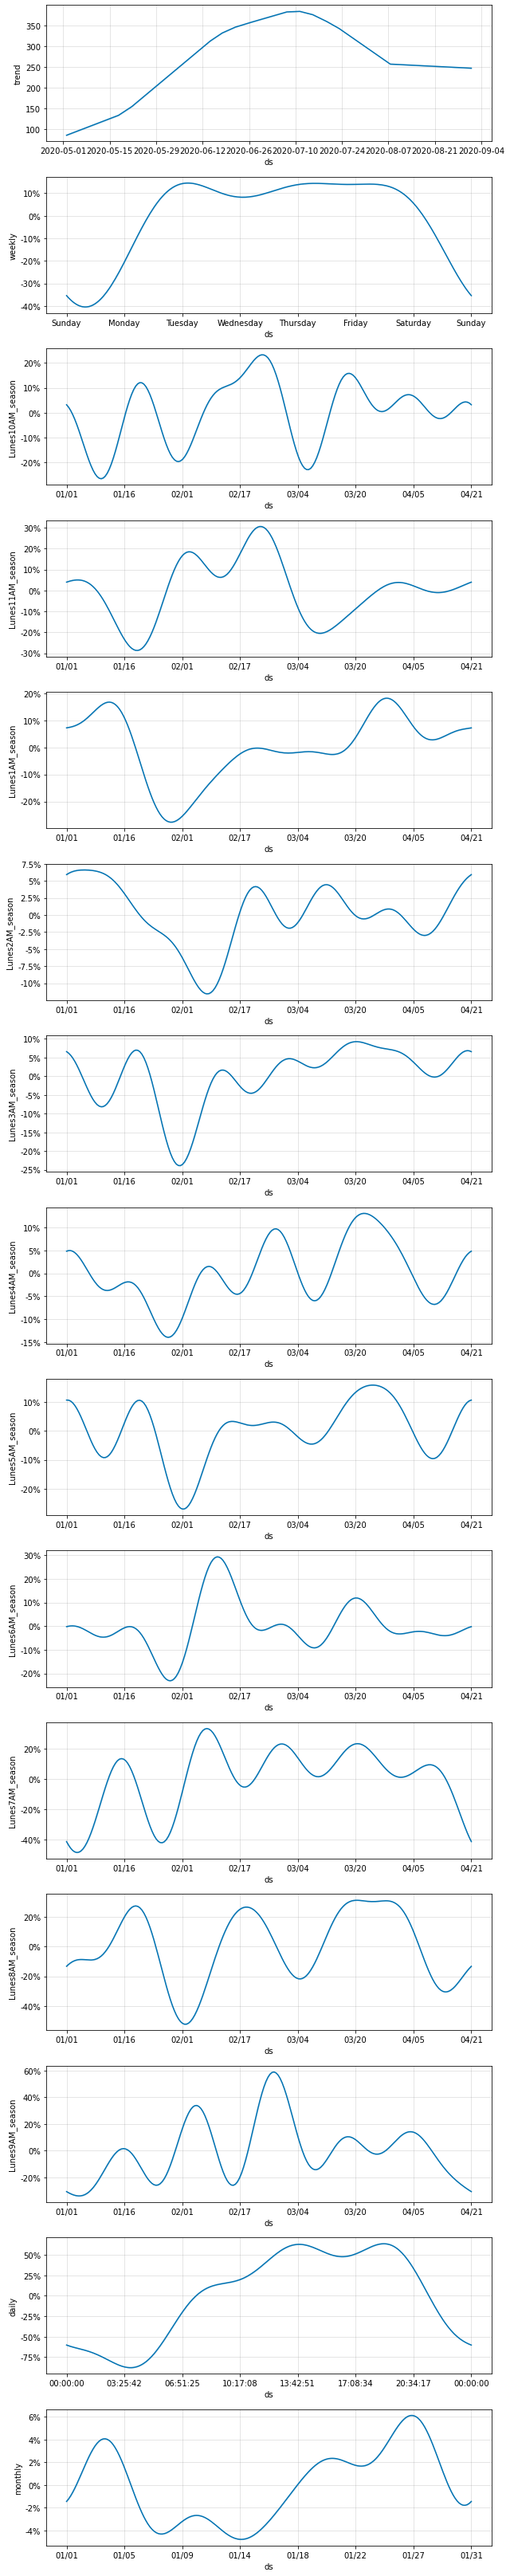

In [12]:
predictions = list()

# Se crea una función de predicción continua
def rolling_forecast():       
    history = Train.copy()   # El problema es en history    
    
    for t in range(len(test_X)):        
        m = Prophet(seasonality_mode='multiplicative')
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#         m.add_seasonality(name='Lunes8AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes8AM')
#         m.add_seasonality(name='Lunes10AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes10AM')
#         m.add_seasonality(name='Lunes2PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes2PM')
        m.add_seasonality(name='Lunes1AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes11AM')
#         m.add_seasonality(name='Lunes12PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes12PM')
#         m.add_seasonality(name='Lunes13PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes13PM')
#         m.add_seasonality(name='Lunes14PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes15PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes15PM')        
#         m.add_seasonality(name='Lunes16PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes16PM')
#         m.add_seasonality(name='Lunes17PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes17PM')
#         m.add_seasonality(name='Lunes18PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes18PM')
#         m.add_seasonality(name='Lunes19PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes19PM')
#         m.add_seasonality(name='Lunes20PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes22PM')
#         m.add_seasonality(name='Lunes23PM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes23PM')
#         m.add_seasonality(name='Lunes24AM_season', period=len(N_Dias), fourier_order=6, condition_name='Lunes24AM')
        
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')   
#         future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)
#         future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)
#         future['Lunes2PM'] = future['ds'].apply(est_Lunes2PM)

        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
#         future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
#         future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
#         future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
#         future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
#         future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
#         future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
#         future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
#         future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
#         future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
#         future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
#         future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
#         future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
#         future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]        
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]         
        predictions.append(yhat)
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [Test[['ds']].iloc[t]], 'y': [Test[['y']].iloc[t]]}
        obs = pd.DataFrame(Test[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM']].iloc[t])#,'Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig
        

fig = rolling_forecast()

# Calculamos RMSE
## Se obtiene una medida RMSE mejor al agregar la estacionalidad por día de la semana y hora
### El modelo ahora cuenta con estacionalidad mensual, semanal, diaria y por hora personalizada. 
### RMSE de 71.8 - Lunes 8Am
### RMSE de 73.29 - Lunes 8Am y Lunes 2PM - fourier6
### RMSE de 73.46 - Lunes 8Am y Lunes 2PM - fourier5
### RMSE de 73.49 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier5
### RMSE de 73.44 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier6
### RMSE de 74.33 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier7  - overfitting
### RMSE de 156.31 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier6 - daily seasonality FALSE
### RMSE de 81.74 - Lunes Todos - fourier 6
### RMSE de 89.49 - Lunes Todos - fourier 6 - seasonality_mode='multiplicative'


In [13]:
# Se obtiene un RMSE de 57.80
error_PROPHET = mean_squared_error(test_X, predictions) **0.5
print('Test RMSE: %.3f' % error_PROPHET)

Test RMSE: 80.431


# Comparamos la curva de prueba y la curva predicha

In [14]:
X = Periodo1['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

RollBack=pd.concat([pd.DataFrame({'TEST':test}),pd.DataFrame({'Prophet':predictions})],axis=1)
RollBack.head()

,TEST,Prophet
0,391.765,396.338279
1,303.351,368.138531
2,234.325,297.916365
3,193.813,215.097710
4,106.866,152.560642


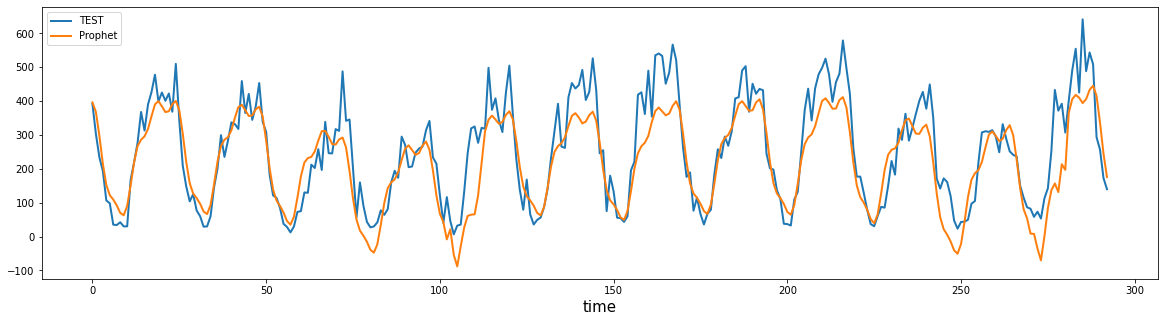

In [15]:
RollBack[['TEST', 'Prophet']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

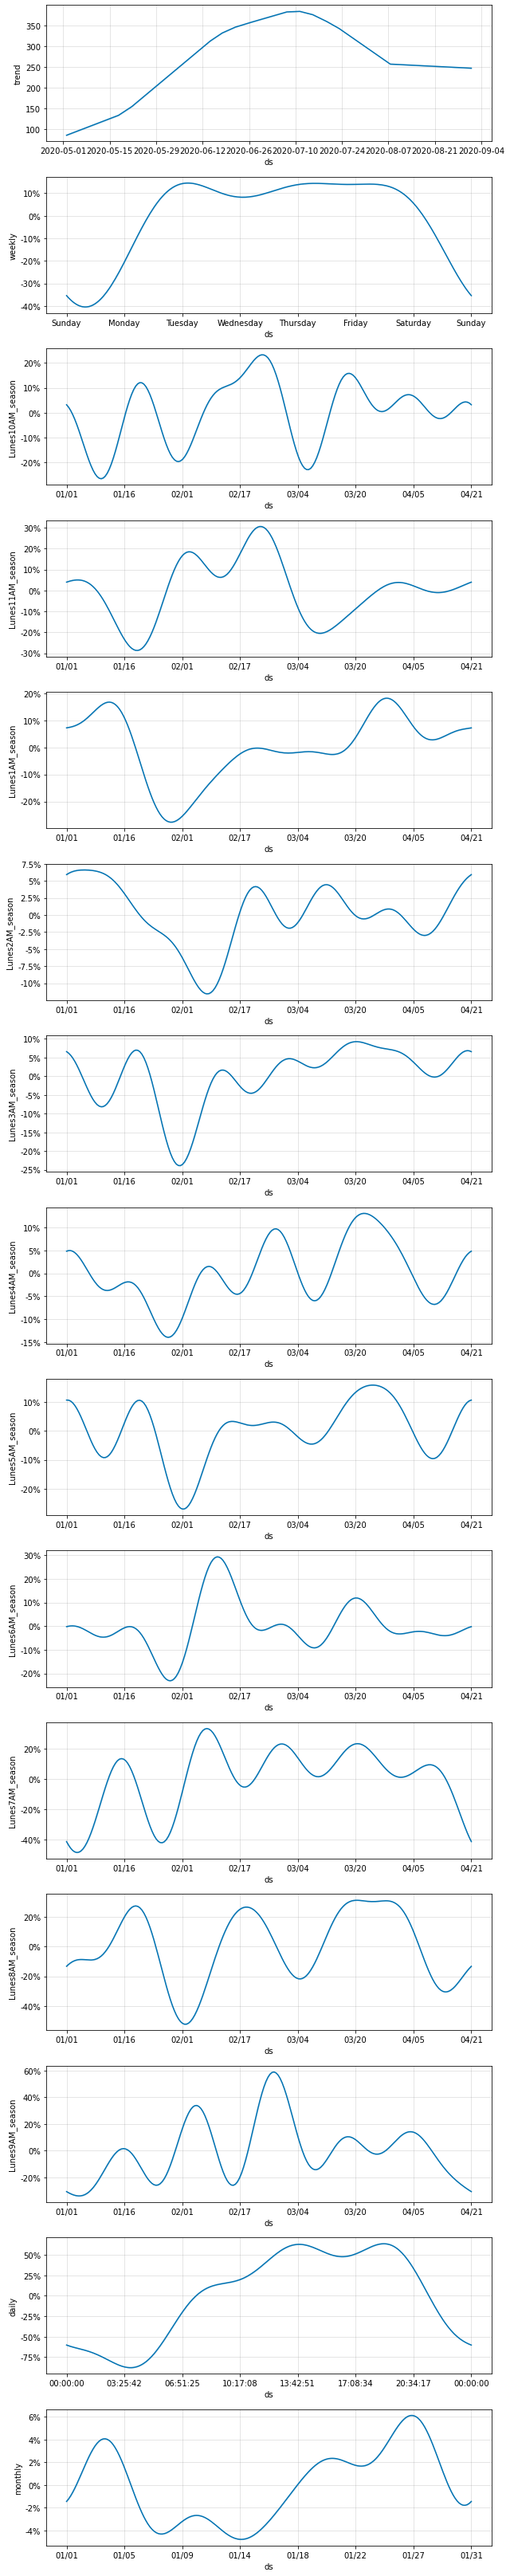

In [16]:
fig